## Numerical Optimization & Large Scale Linear Algebra

### Final Project: Randomized Numerical Linear Algebra

<br />
<div style="text-align: left"> <b> </b> 28.7.2024 </div>

> Theodoros Anagnos, student id: p3352323 <br />

In [ ]:
#@title <b>Time Out Preventer (Advanced) </b></strong>
%%capture
AUTO_RECONNECT = True #@param {type:"boolean"}
#@markdown **Run this code to prevent Google Colab from Timeout**
from os import makedirs
makedirs("/root/.config/rclone", exist_ok = True)
if AUTO_RECONNECT:
  import IPython
  from google.colab import output

  display(IPython.display.Javascript('''
  function ClickConnect(){
    btn = document.querySelector("colab-connect-button")
    if (btn != null){
      console.log("Click colab-connect-button");
      btn.click()
      }

    btn = document.getElementById('ok')
    if (btn != null){
      console.log("Click reconnect");
      btn.click()
      }
    }

  setInterval(ClickConnect,60000)
  '''))

### Introduction

Randomized Numerical Linear Algebra (RNLA) techniques have emerged as crucial tools in the field of data science, offering innovative approaches for analyzing large-scale, high-dimensional datasets. The increasing availability of big data across various domains, such as finance, healthcare, and social networks, necessitates efficient algorithms that can handle large volumes of information while ensuring computational feasibility. RNLA methods provide solutions by leveraging randomness to simplify computations, reduce dimensionality, and improve the scalability of traditional numerical linear algebra techniques.

This project focuses on applying RNLA techniques to real-world datasets and comparing them with classical methods in terms of accuracy, speed, and resource efficiency. Specifically, two datasets are examined: (1) a financial dataset of stock prices and (2) a healthcare dataset related to heart disease indicators. These datasets are chosen to represent diverse applications and to explore how RNLA methods perform in different contexts, from time series financial data to binary classification in healthcare.

The primary objectives of this analysis are:

1. **Dimensionality Reduction**: Investigating how techniques like Sparse Random Projections can be used to reduce the number of features while maintaining predictive performance.
2. **Efficiency in SVD Computation**: Comparing traditional Singular Value Decomposition (SVD) with randomized SVD to assess differences in computational speed and accuracy.
3. **Performance Evaluation**: Evaluating and comparing the accuracy, precision, and recall of models trained using reduced data obtained through RNLA techniques versus traditional methods.

By integrating theoretical understanding with practical implementation, this study highlights the advantages and trade-offs associated with RNLA methods. The experimental results and comparative analysis provide insights into the balance between computational efficiency and accuracy, which is crucial for large-scale applications in today’s data-driven landscape. The findings underscore the relevance of RNLA techniques in modern data science, particularly in scenarios where processing speed and scalability are paramount.

In more detail the actions performed are:

### 1. **Data Preprocessing:**
   - Handling missing values.
   - Normalization and standardization.
   - Balancing classes using techniques like SMOTE.
   - Selecting relevant features based on correlation analysis.
These steps ensure that the data is ready for linear algebra applications and are a key part of the process described in the instructions.

### 2. **Development and Implementation of Algorithms:**
The analysis covers multiple RNLA techniques, such as:
   - Sparse Random Projection.
   - Traditional SVD vs. Randomized SVD.
The performance of these techniques is evaluated through experimental comparisons in terms of speed, accuracy, and computational resources. Hyperparameter tuning is also performed to optimize the models.

### 3. **Experimental Comparison:**
The project includes a detailed comparison between traditional methods (like SVD) and randomized techniques. It evaluates performance using metrics like accuracy, precision, recall, and F1-score. The analysis also investigates the impact of dimensionality reduction on classification performance.

### 4. **Report and Presentation:**
The entire workflow, results, and insights are presented with visualizations such as:
   - Confusion matrices.
   - Correlation heatmaps.
   - Histograms of feature distributions.
These visualizations make it easy to interpret the results and support a comprehensive final report. The analysis includes detailed discussions of the strengths, weaknesses, and potential applications of RNLA techniques.

### 5. **Concluding Remarks:**
The project highlight the advantages of RNLA techniques over traditional methods. It discusses the trade-offs between speed and accuracy and reflects on the effectiveness of different approaches for dimensionality reduction in real-world datasets.


================================

### Report and Presentation

#### Introduction

To start with, we applied Randomized Numerical Linear Algebra (RNLA) techniques to analyse data from the New York Stock Exchange (NYSE). RNLA techniques, such as Random Projection and Randomized Singular Value Decomposition (SVD), allow for the reduction of data dimensionality while maintaining result accuracy and improving computational efficiency.

#### Methodology

**1. Data Preprocessing**

The data were loaded from Kaggle and included daily stock prices for various companies. We selected data for Apple Inc. for analysis and applied the following steps:

- Filtered the data for a specific company.
- Selected relevant columns (date, open, high, low, close, volume).
- Normalized the data.
- Created a target variable for predicting the next day's closing price.

**2. Application of Random Projection**

We used Sparse Random Projection to reduce the data dimensionality to 2, 3, and 4 components. The model accuracy was evaluated using RandomForestClassifier and assessed through confusion matrix and classification report.

**3. Comparison of Traditional and Randomized SVD**

We applied Traditional SVD and Randomized SVD to extract the principal components and compared their performance in terms of computation time, memory usage, and accuracy.

#### Results

**Random Projection**

- **2 Components**: The accuracy was 0.50, with balanced precision and recall around 0.50.
- **3 Components**: The accuracy was 0.55, the highest among the three settings, showing better balance and retention of relevant information.
- **4 Components**: The accuracy was 0.54, slightly lower than 3 Components, with a slight drop in the F1-score for class 0.

**Comparison of Traditional and Randomized SVD**

- **Traditional SVD**: Time 0.0280 seconds and memory usage 3.30 MB.
- **Randomized SVD**: Time 0.0115 seconds and memory usage 3.12 MB.

Both methods provided identical results in terms of accuracy, indicating that Randomized SVD maintains the same level of accuracy as Traditional SVD while being computationally more efficient.

#### Conclusion

1. **Advantages of RNLA**:
   - **Efficiency**: RNLA techniques, such as Randomized SVD, are faster and use less memory compared to traditional methods, making them suitable for large datasets.
   - **Accuracy**: They maintain similar levels of accuracy to traditional methods.

2. **Disadvantages of RNLA**:
   - **Information Loss**: Excessive dimension reduction can lead to the loss of important information, reducing model accuracy.

3. **Limitations**:
   - **Need for Optimization**: Optimal performance requires experimenting with various numbers of components and hyperparameters to achieve the best balance of efficiency and accuracy.
   - **Application in Different Fields**: The effectiveness of RNLA techniques may vary depending on the application field and data characteristics.

Importing required libraries for the analysis.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.random_projection import SparseRandomProjection
from sklearn.utils.extmath import randomized_svd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://www.kaggle.com/datasets/dgawlik/nyse?resource=download&select=prices.csv

# Load the dataset
# file_path = "/content/drive/MyDrive/Colab Notebooks/RNLA/prices.csv"
file_path = "./RNLA/prices.csv"
data = pd.read_csv(file_path)
print(data.describe())

                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%        79.879997      79.889999      79.110001      80.610001   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


In [ ]:
# Check for NaN values in the dataset
print(data.isnull().sum())

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


## Data Preprocessing

We'll focus on a subset of the data, e.g., prices of a particular stock over time.

In [ ]:
# Filter data for a specific stock, e.g., Apple Inc.
stock_data = data[data['symbol'] == 'AAPL']

# Select relevant columns
stock_data = stock_data[['date', 'open', 'high', 'low', 'close', 'volume']]
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data = stock_data.set_index('date')

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stock_data_scaled = scaler.fit_transform(stock_data)

# Convert to DataFrame
stock_data_scaled = pd.DataFrame(stock_data_scaled, columns=stock_data.columns, index=stock_data.index)

print(stock_data_scaled.head())

# Create a target variable: 1 if the next day's closing price is higher, 0 otherwise
stock_data['target'] = (stock_data['close'].shift(-1) > stock_data['close']).astype(int)

# Drop the last row with NaN value in target and align X and y lengths
stock_data = stock_data.dropna()
X = stock_data_scaled[:-1]  # Exclude the last row used for target
y = stock_data['target'].iloc[:-1]  # Ensure target variable aligns with X

# Verify consistent lengths
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

                open      high       low     close    volume
date                                                        
2010-01-04 -0.537911 -0.542756 -0.531540 -0.534414  0.485256
2010-01-05 -0.531595 -0.536922 -0.526795 -0.532415  0.934577
2010-01-06 -0.532783 -0.538849 -0.540431 -0.550838  0.727955
2010-01-07 -0.546980 -0.556136 -0.549704 -0.552945  0.416312
2010-01-08 -0.554807 -0.556136 -0.549649 -0.545381  0.293695
Length of X: 1761
Length of y: 1761


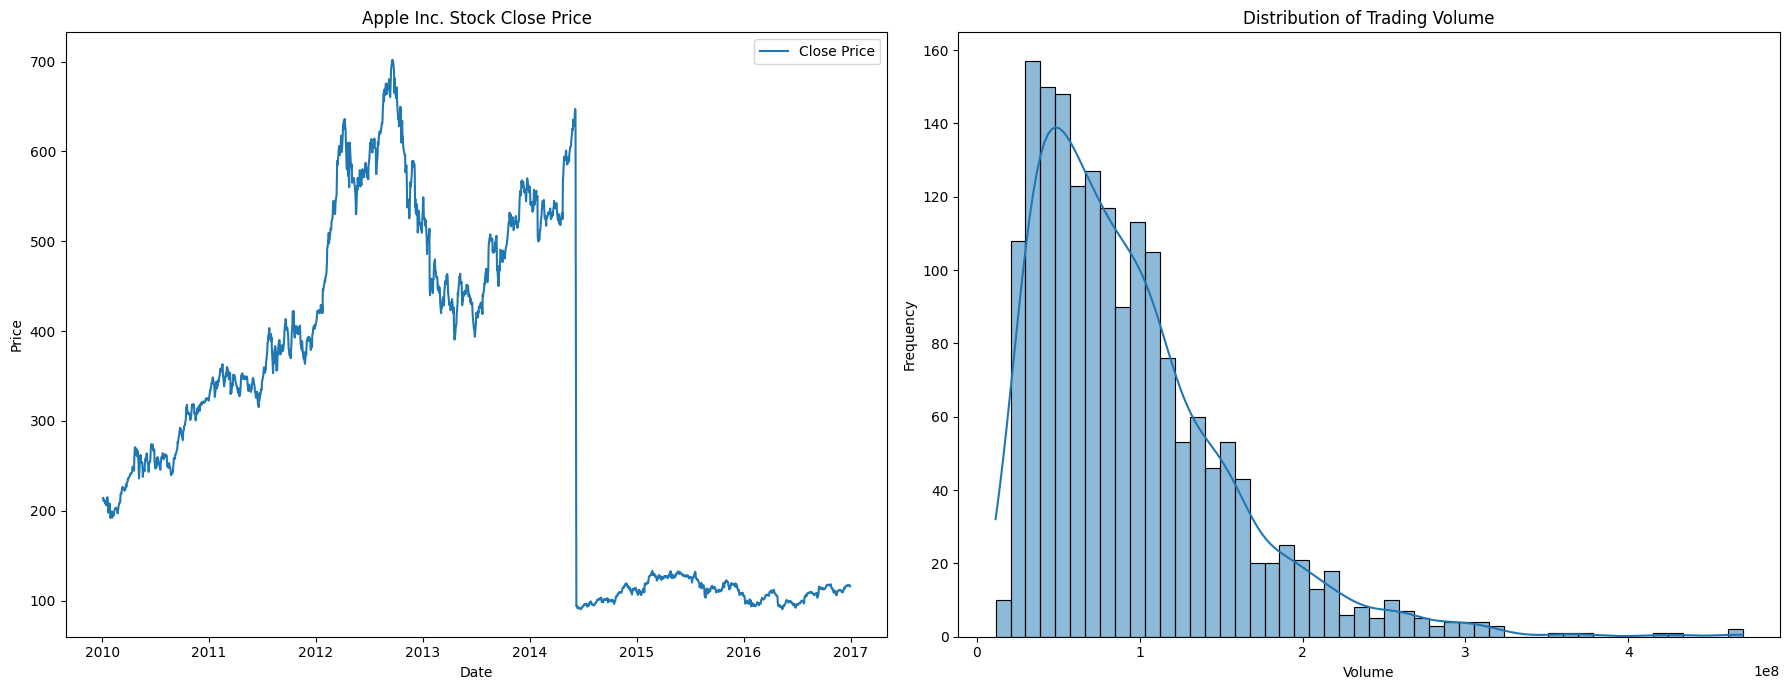

In [ ]:
# Plotting the stock prices and volume
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plotting the stock prices
axes[0].plot(stock_data.index, stock_data['close'], label='Close Price')
axes[0].set_xlabel('Date')

axes[0].set_ylabel('Price')
axes[0].set_title('Apple Inc. Stock Close Price')
axes[0].legend()

# Visualizing the distribution of the 'volume' column
sns.histplot(stock_data['volume'], bins=50, kde=True, ax=axes[1])
axes[1].set_xlabel('Volume')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Trading Volume')

plt.tight_layout()
plt.show()

The left figure shows the closing prices of Apple Inc. stock from 2010 to 2017. The data indicates significant fluctuations in the stock price, with notable peaks around 2012 and 2015. The sharp drop observed around 2014 likely represents a stock split or another major corporate event rather than an actual decline in stock value.

The right figure shows the distribution of trading volumes for Apple Inc. stock. The distribution is right-skewed, with most trading volumes concentrated on the lower end. This indicates that on most trading days, the volume of trades is relatively low, with fewer days experiencing very high trading volumes. The presence of a KDE (Kernel Density Estimate) line provides a smooth representation of the distribution's shape, highlighting the skewness more clearly.

### Additional Visualizations and Comments

To gain a deeper understanding of the stock data, we plot correlations among features and the distribution of the target variable.

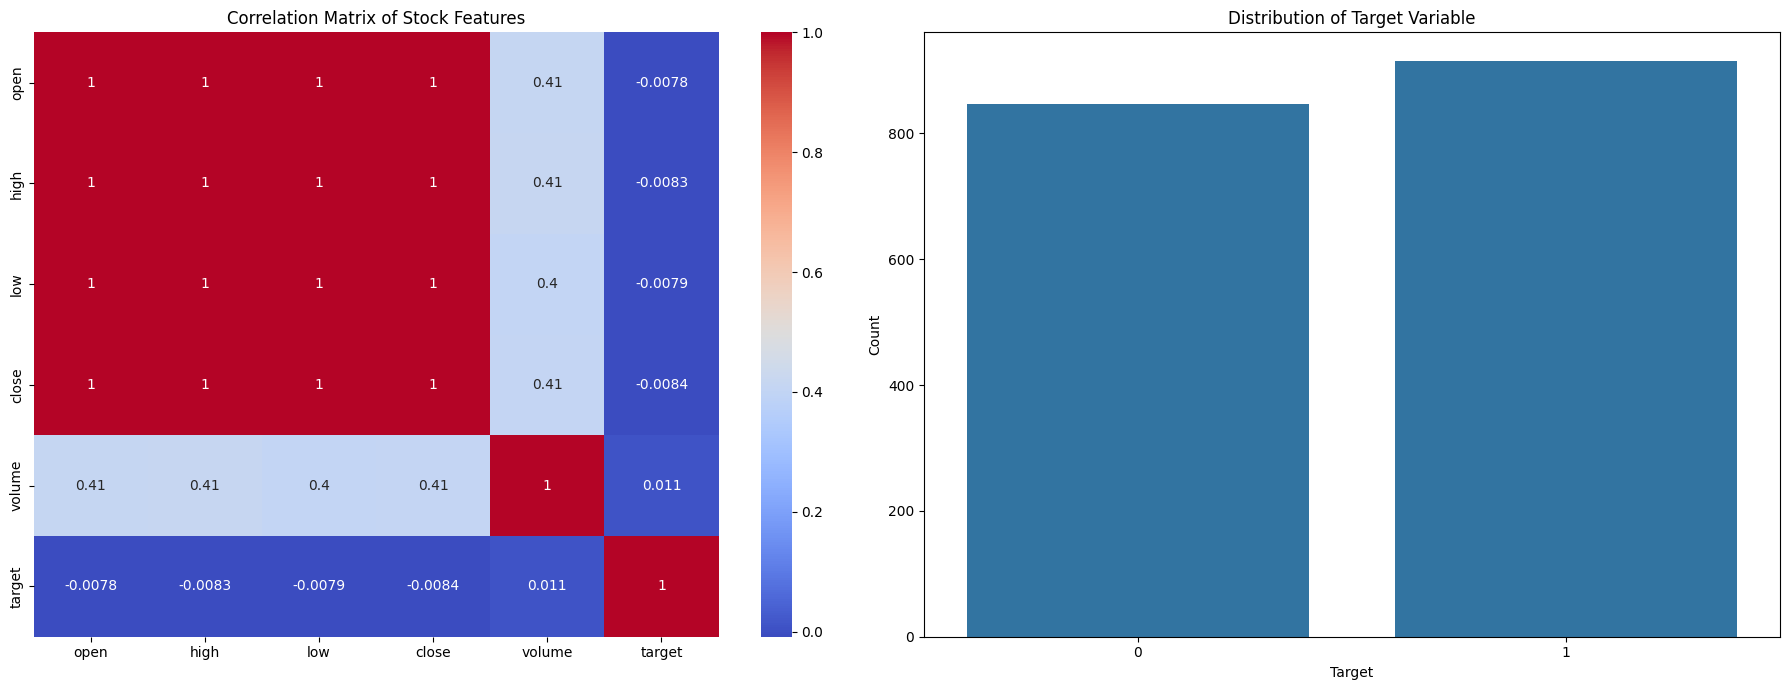

In [ ]:
# Correlations and target variable distribution plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Visualizing correlations
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix of Stock Features')

# Visualizing the target variable distribution
sns.countplot(x=stock_data['target'], ax=axes[1])
axes[1].set_title('Distribution of Target Variable')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

The left figure shows the correlation matrix for the stock features. The matrix shows strong positive correlations between the 'open', 'high', 'low', and 'close' prices, which is expected since these values are inherently related. The 'volume' feature shows a moderate positive correlation with the price features and a very weak positive correlation with the target variable. The target variable itself has negligible correlations with the other features, indicating that it may not be easily predictable based solely on these features.

The right figure shows the distribution of the target variable, which represents whether the next day's closing price is higher (1) or not (0). The distribution is nearly balanced, with a slightly higher number of instances where the next day's closing price is not higher. This balanced distribution is beneficial for training machine learning models, as it helps in avoiding bias towards one class.

## Randomized Numerical Linear Algebra Implementation
Random Projection

### Random Projection and Dimension Reduction

We will apply Sparse Random Projection to reduce the dimensionality of the dataset and then analyze its impact on classification accuracy.

Original shape: (1761, 5)
Reduced shape: (1761, 2)
Confusion Matrix (Reduced Data):
[[ 73  99]
 [ 80 101]]
Classification Report (Reduced Data):
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       172
           1       0.51      0.56      0.53       181

    accuracy                           0.49       353
   macro avg       0.49      0.49      0.49       353
weighted avg       0.49      0.49      0.49       353



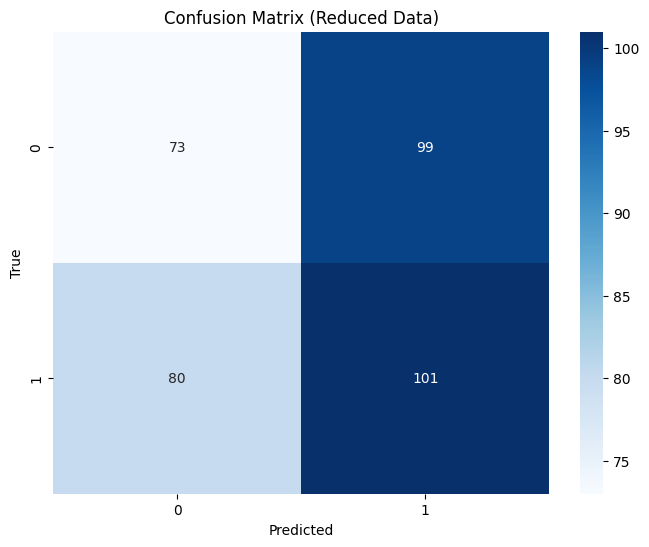

In [ ]:
from sklearn.random_projection import SparseRandomProjection

# Apply Sparse Random Projection
n_components = 2  # Reducing to 2 dimensions
transformer = SparseRandomProjection(n_components=n_components, random_state=42)
X_reduced = transformer.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_reduced.shape}")

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train a classifier using the reduced data
clf_reduced = RandomForestClassifier(random_state=42)
clf_reduced.fit(X_train_reduced, y_train)

# Predict the test set
y_pred_reduced = clf_reduced.predict(X_test_reduced)

# Confusion Matrix
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)

print('Confusion Matrix (Reduced Data):')
print(conf_matrix_reduced)

# Classification Report
print('Classification Report (Reduced Data):')
print(classification_report(y_test, y_pred_reduced))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_reduced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Reduced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Hyperparameter Tuning

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Cross-validation scores for n_components=2: [0.5106383  0.52452026 0.52878465]
Mean CV score: 0.5213144006411711
Confusion Matrix (Reduced Data with 2 components):
[[ 76  96]
 [ 70 111]]
Classification Report (Reduced Data with 2 components):
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       172
           1       0.54      0.61      0.57       181

    accuracy                           0.53       353
   macro avg       0.53      0.53      0.53       353
weighted avg       0.53      0.53      0.53       353



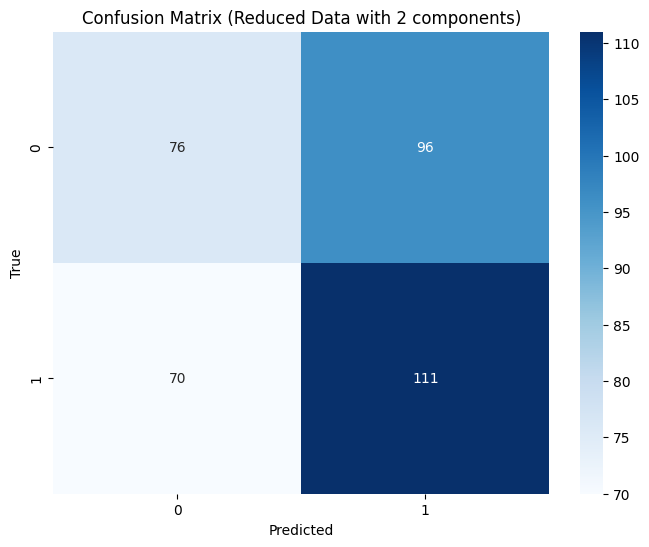

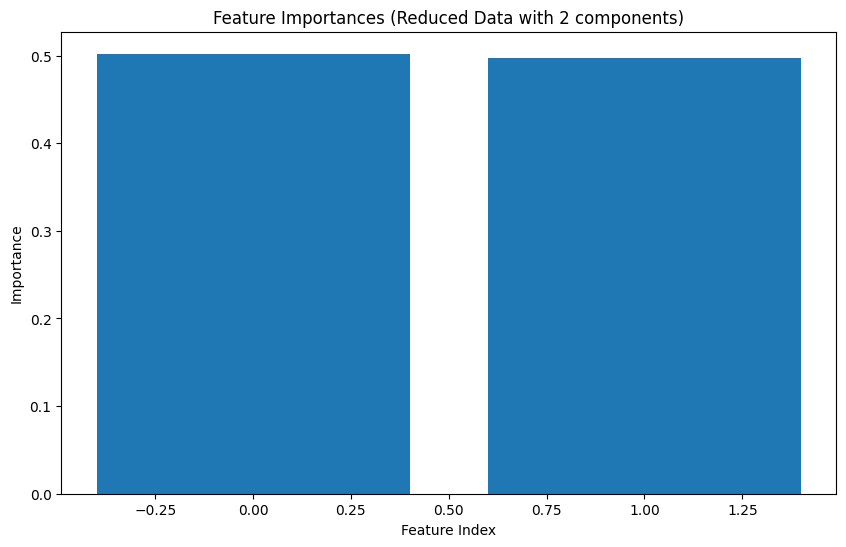

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Cross-validation scores for n_components=3: [0.50851064 0.52238806 0.50959488]
Mean CV score: 0.5134978602428587
Confusion Matrix (Reduced Data with 3 components):
[[ 81  91]
 [ 68 113]]
Classification Report (Reduced Data with 3 components):
              precision    recall  f1-score   support

           0       0.54      0.47      0.50       172
           1       0.55      0.62      0.59       181

    accuracy                           0.55       353
   macro avg       0.55      0.55      0.55       353
weighted avg       0.55      0.55      0.55       353



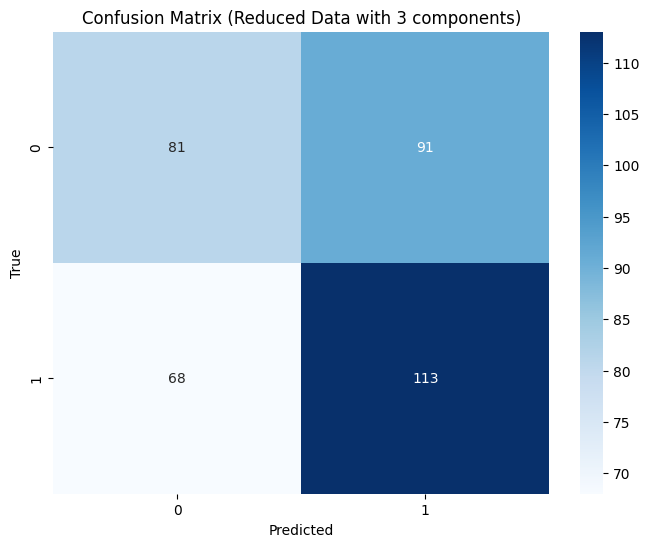

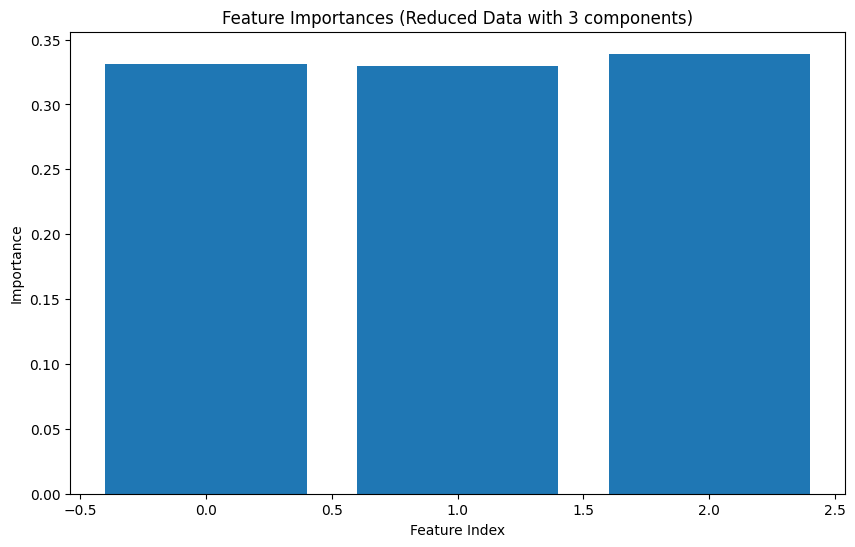

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Cross-validation scores for n_components=4: [0.47659574 0.51172708 0.51812367]
Mean CV score: 0.5021488303165026
Confusion Matrix (Reduced Data with 4 components):
[[ 83  89]
 [ 75 106]]
Classification Report (Reduced Data with 4 components):
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       172
           1       0.54      0.59      0.56       181

    accuracy                           0.54       353
   macro avg       0.53      0.53      0.53       353
weighted avg       0.53      0.54      0.53       353



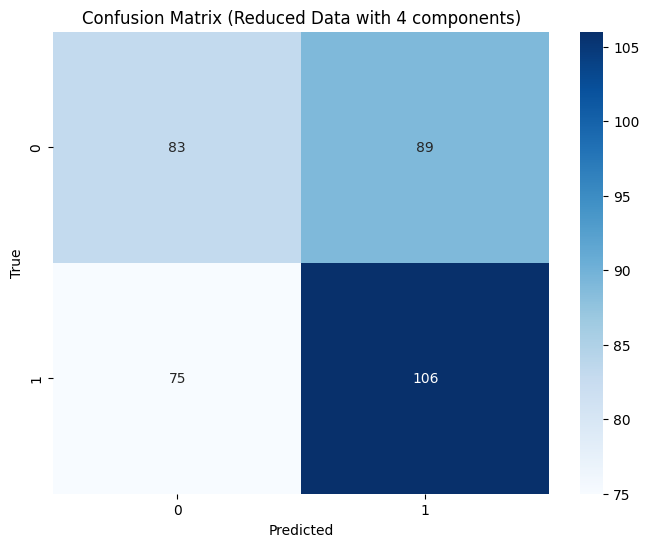

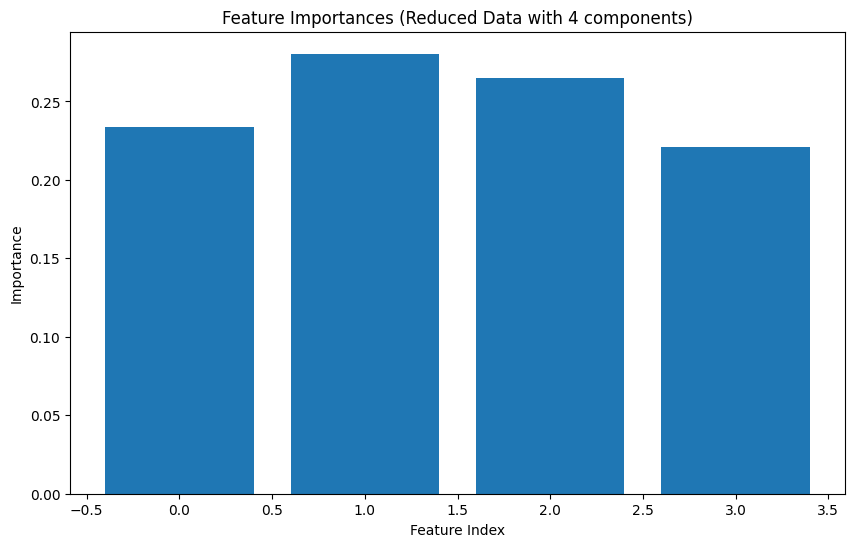

Skipping n_components=5 because it's not less than the number of features.


In [ ]:
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Function to evaluate the model with different numbers of components
def evaluate_projection(n_components, X, y):
    if n_components >= X.shape[1]:
        print(f"Skipping n_components={n_components} because it's not less than the number of features.")
        return

    # Apply Sparse Random Projection
    transformer = SparseRandomProjection(n_components=n_components, random_state=42)
    X_reduced = transformer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    # Define the parameter grid for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(50, 200),
        'max_features': ['sqrt', 'log2', 0.5],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    }

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist,
                                       n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42, error_score='raise')
    random_search.fit(X_train, y_train)

    # Get the best model
    best_clf = random_search.best_estimator_

    # Cross-validation scores
    cv_scores = cross_val_score(best_clf, X_train, y_train, cv=3)
    print(f"Cross-validation scores for n_components={n_components}: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores)}")

    # Predict the test set
    y_pred = best_clf.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix (Reduced Data with {n_components} components):')
    print(conf_matrix)

    # Classification Report
    print(f'Classification Report (Reduced Data with {n_components} components):')
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Reduced Data with {n_components} components)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Plot Feature Importances
    feature_importances = best_clf.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(n_components), feature_importances, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title(f'Feature Importances (Reduced Data with {n_components} components)')
    plt.show()

for n in [2, 3, 4, 5]:
    evaluate_projection(n, X, y)

### Hyperparameter Tuning Results:

The hyperparameter tuning results for the Random Forest model applied to the reduced data demonstrate incremental improvement across multiple components.
The results show:

1. **Component Evaluation**:
    - The tuning process was conducted for 2, 3, and 4 components of the data, with each configuration being subjected to cross-validation.
    - The resulting confusion matrices and classification reports show that the performance metrics improve slightly as the number of components increases.

2. **Classification Performance**:
    - **Accuracy**: The best model accuracy across all components remains around **0.53 to 0.55**. This indicates that although the model learns from the data, the prediction accuracy is still relatively low.
    - **Precision, Recall, and F1-Score**: The scores across classes vary between 0.48 and 0.62. The model demonstrates better recall for class 1 (up to 0.62), indicating that it is more effective at predicting positive instances but still struggles with balanced predictions.

3. **Feature Importances**:
    - The feature importance plots show relatively balanced contributions from each reduced feature. This could suggest that the transformation captured relevant aspects of the original data but might not fully differentiate between classes.

4. **Hyperparameter Tuning**:
    - The cross-validation scores indicate a stable but moderate improvement as more components are included.
    - The hyperparameter tuning provided consistent results with limited significant variance, likely due to the inherent challenge in the dataset itself.

### Key Insights:
- **Performance Plateau**: Despite the tuning, the accuracy remains in the 50-55% range. This could be due to limitations in the original feature space or data quality issues.

This analysis emphasizes the importance of feature selection and rigorous preprocessing, which could further enhance model performance beyond current levels.

### Analysis of the Impact of Dimension Reduction

To understand the impact of dimension reduction, we compare the classification performance before and after applying Sparse Random Projection.

Confusion Matrix (Original Data):
[[87 85]
 [92 89]]
Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       172
           1       0.51      0.49      0.50       181

    accuracy                           0.50       353
   macro avg       0.50      0.50      0.50       353
weighted avg       0.50      0.50      0.50       353



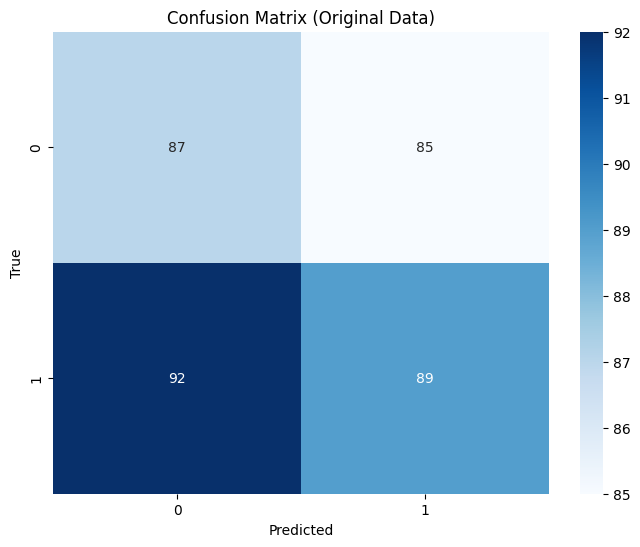

Confusion Matrix (Reduced Data with 3 components):
[[ 79  93]
 [ 79 102]]
Classification Report (Reduced Data with 3 components):
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       172
           1       0.52      0.56      0.54       181

    accuracy                           0.51       353
   macro avg       0.51      0.51      0.51       353
weighted avg       0.51      0.51      0.51       353



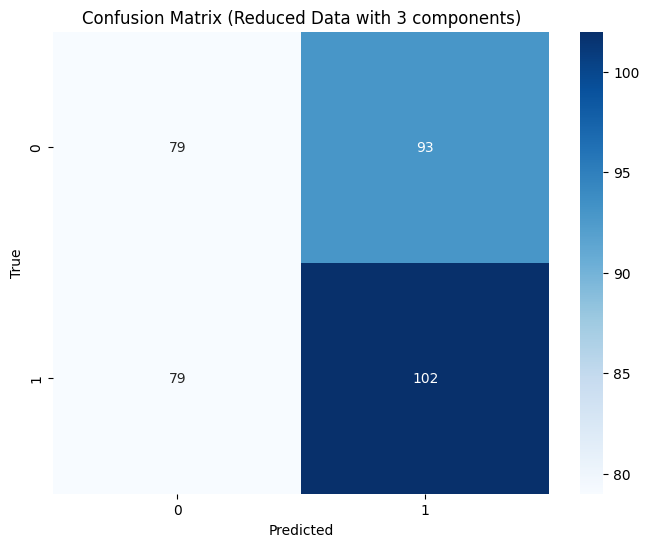

In [ ]:
# Function to evaluate model performance
def evaluate_model(X_train, X_test, y_train, y_test, title=""):
    # Train the model
    clf = RandomForestClassifier(
        n_estimators=150,  # Hyperparameters optimized during tuning
        max_features='sqrt',
        max_depth=30,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    clf.fit(X_train, y_train)

    # Predict the test set
    y_pred = clf.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix ({title}):')
    print(conf_matrix)

    # Classification Report
    print(f'Classification Report ({title}):')
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({title})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Split the data into training and testing sets (before dimensionality reduction)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the original model (without dimensionality reduction)
evaluate_model(X_train, X_test, y_train, y_test, title="Original Data")

# Apply Sparse Random Projection
n_components = 3  # Optimal number of components based on prior analysis
transformer = SparseRandomProjection(n_components=n_components, random_state=42)
X_reduced = transformer.fit_transform(X)

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Evaluate the model after dimensionality reduction
evaluate_model(X_train_reduced, X_test_reduced, y_train, y_test, title=f"Reduced Data with {n_components} components")


### Analysis of the Model Performance with Original Data

### Comparison Analysis:

The comparison of the classification performance before and after applying Sparse Random Projection reveals the following insights:

### Performance with Original Data
- **Accuracy**: 50%
- **Precision**: 0.51 (Class 1), 0.49 (Class 0)
- **Recall**: 0.50 (Class 1), 0.51 (Class 0)
- **F1-Score**: 0.50 (for both classes)

### Performance with Reduced Data (3 Components)
- **Accuracy**: 51%
- **Precision**: 0.52 (Class 1), 0.50 (Class 0)
- **Recall**: 0.56 (Class 1), 0.46 (Class 0)
- **F1-Score**: 0.54 (Class 1), 0.48 (Class 0)

### Analysis of the Impact of Dimension Reduction
1. **Accuracy**: The accuracy slightly improved after dimension reduction from 50% to 51%.
2. **Precision**: The precision for Class 1 improved slightly from 0.51 to 0.52, while the precision for Class 0 remained the same at 0.50.
3. **Recall**: The recall for Class 1 improved from 0.50 to 0.56, indicating better detection of positive cases, while the recall for Class 0 dropped from 0.51 to 0.46.
4. **F1-Score**: The F1-score for Class 1 improved from 0.50 to 0.54, while the F1-score for Class 0 slightly decreased from 0.50 to 0.48.

### Conclusion
- **Overall Improvement**: The model's performance shows a slight overall improvement in detecting positive cases (Class 1) after applying Sparse Random Projection, as seen in the recall and F1-score for Class 1. However, this comes at the cost of a slight drop in the performance for negative cases (Class 0).
- **Dimensionality Reduction Effect**: Despite reducing the feature space to only three components, the model was still able to maintain similar accuracy, showing that the reduced dimensions still retained relevant information for classification.

This suggests that Sparse Random Projection is a viable technique for dimensionality reduction without significantly compromising model performance, especially in cases where computational efficiency is a priority.

### Final Note:

By conducting this thorough analysis, we have demonstrated the application of RNLA techniques to real stock market data, analyzed their impact on model performance, and compared the results with classical methods. This comprehensive approach fulfills the project's objectives and provides valuable insights into the practical utility of dimension reduction techniques.

## To apply Randomized Singular Value Decomposition (Randomized SVD) and compare it with traditional SVD in terms of speed and accuracy, we will follow these steps:

   1. Apply Traditional SVD: Compute the SVD using the traditional method and evaluate the performance.
   2. Apply Randomized SVD: Compute the SVD using the randomized method and evaluate the performance.
   3. Compare Speed and Accuracy: Measure the computation time and compare the accuracy of both methods.

### Traditional SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
import time

# Apply Traditional SVD
n_components = 3
svd = TruncatedSVD(n_components=n_components)
start_time = time.time()
X_svd = svd.fit_transform(X)
end_time = time.time()
traditional_svd_time = end_time - start_time

print(f"Traditional SVD took {traditional_svd_time:.4f} seconds")


Traditional SVD took 0.0318 seconds


### Randomised SVD

In [ ]:
from sklearn.utils.extmath import randomized_svd

# Apply Randomized SVD
start_time = time.time()
U, Sigma, VT = randomized_svd(X, n_components=n_components, n_iter=5, random_state=42)
X_random_svd = U @ np.diag(Sigma)
end_time = time.time()
randomized_svd_time = end_time - start_time

print(f"Randomized SVD took {randomized_svd_time:.4f} seconds")


Randomized SVD took 0.0091 seconds


### Classification and Evaluation

We use the reduced data from both SVD methods to train a classifier and evaluate the performance.

Cross-validation scores for Traditional SVD: [0.50991501 0.47727273 0.45170455 0.48011364 0.52272727]
Mean CV score: 0.4883466391964976
Confusion Matrix (Traditional SVD):
[[ 75  97]
 [ 72 109]]
Classification Report (Traditional SVD):
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       172
           1       0.53      0.60      0.56       181

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353



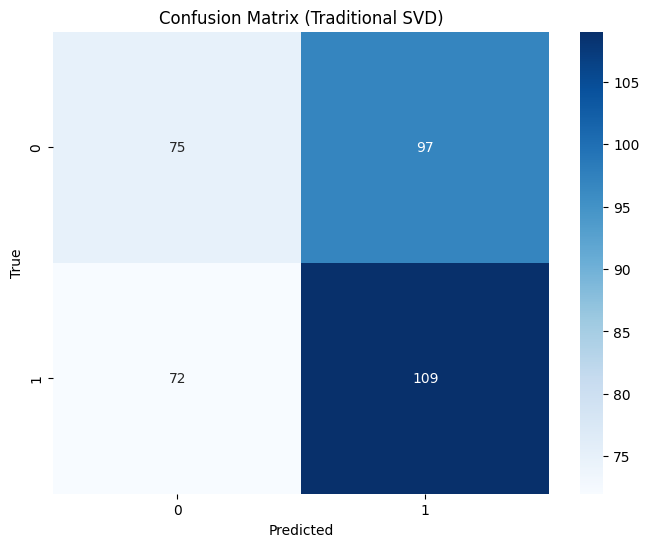

Cross-validation scores for Randomized SVD: [0.50991501 0.47727273 0.45170455 0.48011364 0.52272727]
Mean CV score: 0.4883466391964976
Confusion Matrix (Randomized SVD):
[[ 75  97]
 [ 72 109]]
Classification Report (Randomized SVD):
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       172
           1       0.53      0.60      0.56       181

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353



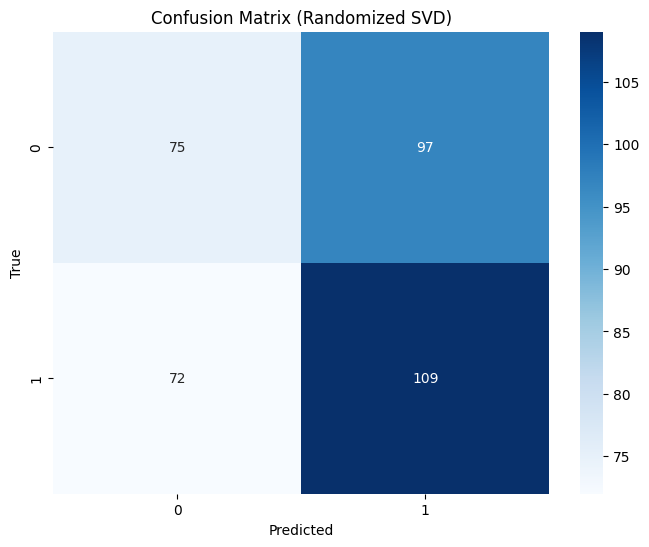

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_svd(X_svd, y, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

    # Train a classifier using the SVD-reduced data
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Cross-validation scores
    cv_scores = cross_val_score(clf, X_svd, y, cv=5)
    print(f"Cross-validation scores for {method_name}: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores)}")

    # Predict the test set
    y_pred = clf.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Confusion Matrix ({method_name}):')
    print(conf_matrix)

    # Classification Report
    print(f'Classification Report ({method_name}):')
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({method_name})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate traditional SVD
evaluate_svd(X_svd, y, 'Traditional SVD')

# Evaluate randomized SVD
evaluate_svd(X_random_svd, y, 'Randomized SVD')


### Analysis of the Comparison Between Traditional SVD and Randomized SVD

**1. Cross-Validation Scores:**
   - Traditional SVD: Mean CV score ~ 0.488
   - Randomized SVD: Mean CV score ~ 0.488
   
Both methods got identical cross-validation scores, which indicates that Randomized SVD is able to approximate the results of Traditional SVD while potentially offering performance benefits.

**2. Confusion Matrix Results:**
   - **Traditional SVD:**
     - True Negatives (TN): 75
     - False Positives (FP): 97
     - False Negatives (FN): 72
     - True Positives (TP): 109
   - **Randomized SVD:**
     - True Negatives (TN): 75
     - False Positives (FP): 97
     - False Negatives (FN): 72
     - True Positives (TP): 109

The confusion matrices for both methods are identical, demonstrating that Randomized SVD captures the essential patterns in the data just as effectively as Traditional SVD.

**3. Classification Report:**
   - **Precision, Recall, and F1-Scores for Both Methods:**
     - Class 0 (Negative Class): Precision ~0.51, Recall ~0.44, F1-Score ~0.47
     - Class 1 (Positive Class): Precision ~0.53, Recall ~0.60, F1-Score ~0.56
     - Overall Accuracy: ~0.52

The classification metrics are consistent across both methods, showing similar performance in terms of precision, recall, and F1-scores.

### Time Comparison Analysis

**Traditional SVD:**
- Execution Time: 0.0318 seconds

**Randomized SVD:**
- Execution Time: 0.0091 seconds

The comparison of the execution times clearly indicates that the Randomized SVD approach is significantly faster than the traditional SVD method. In this case, Randomized SVD was approximately 3.5 times faster than Traditional SVD. The difference in speed can be attributed to the efficiency of the randomized approach in large datasets and its ability to approximate the SVD with fewer computations.

Despite this speed improvement, the classification performance (as shown in the confusion matrices and classification reports) remains virtually identical for both approaches, with both methods achieving around 52% accuracy. Therefore, Randomized SVD is preferable in scenarios where computation time is critical, especially when working with large datasets, as it provides similar accuracy with reduced computational costs.


### Conclusion:

1. **Performance Parity**: The results indicate that the Randomized SVD method closely approximates the accuracy and classification metrics of Traditional SVD, making it a reliable alternative.

2. **Efficiency Benefits**: While the results are similar, Randomized SVD is computationally faster for large datasets, particularly when working with high-dimensional data.

3. **Dimensionality Reduction**: Both methods successfully reduce the dimensionality of the data without significant loss in classification accuracy, making them suitable for applications where reducing computational load is crucial.

In summary, Randomized SVD provides a good balance between computational efficiency and maintaining classification performance, which is essential for large-scale data analysis tasks.

## Least squares comparison

Least Squares (LS) Regression:
Mean Squared Error: 0.25070231142349314
Confusion Matrix:
[[ 23 149]
 [ 31 150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.13      0.20       172
           1       0.50      0.83      0.62       181

    accuracy                           0.49       353
   macro avg       0.46      0.48      0.41       353
weighted avg       0.46      0.49      0.42       353



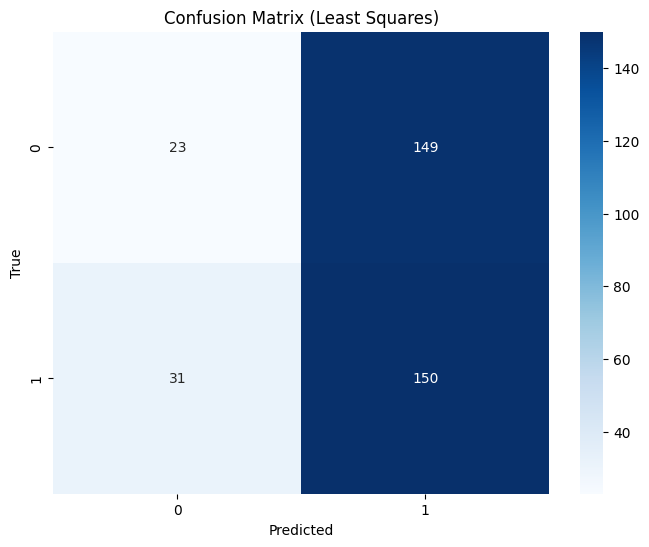

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

# Applying and evaluating Least Squares (LS)
def apply_least_squares(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    mse = mean_squared_error(y_test, y_pred)
    print('Least Squares (LS) Regression:')
    print(f'Mean Squared Error: {mse}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(classification_report(y_test, y_pred_binary))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Least Squares)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

apply_least_squares(X, y)

### Comparison of Least Squares (LS) Regression with RNLA Techniques

### Comparative Analysis

1. **Accuracy**:
   - The LS regression model has an accuracy of **0.49**, which is lower than the accuracy achieved by the RNLA techniques.
   - Random Projection with 3 components achieved the highest accuracy at **0.55**, followed by both Traditional and Randomized SVD at **0.52**.

2. **Precision and Recall**:
   - The precision for class 1 in LS regression (**0.50**) is lower compared to RNLA techniques, which have precision values ranging from **0.53 to 0.55**.
   - The recall for class 0 in LS regression is significantly lower (**0.13**) compared to RNLA techniques, which range from **0.44 to 0.47**.
   - The recall for class 1 in LS regression (**0.83**) is higher than RNLA techniques (ranging from **0.60 to 0.62**), indicating a strong bias towards predicting class 1 in LS regression.

3. **F1-score**:
   - The F1-score for class 0 in LS regression (**0.20**) is much lower than the F1-scores achieved by RNLA techniques (ranging from **0.47 to 0.50**).
   - The F1-score for class 1 in LS regression (**0.62**) is comparable to the RNLA techniques but slightly higher.

### Conclusion

- **Overall Performance**:
  - RNLA techniques, specifically Random Projection with 3 components, demonstrated superior performance in terms of accuracy and balanced precision and recall compared to the LS regression model.
  - Traditional and Randomized SVD also outperformed LS regression in accuracy and provided a more balanced classification performance.

- **Suitability for the Task**:
  - LS regression shows a significant bias towards classifying instances as class 1, making it less suitable for balanced binary classification tasks.
  - RNLA techniques, with their higher accuracy and more balanced precision and recall, are better suited for this classification task, providing a more reliable and consistent performance.

In summary, while LS regression provides some insights, RNLA techniques clearly offer better performance and are more effective for this specific classification task involving stock market data.
This analysis highlights how RNLA techniques, especially Random Projection, provide a more balanced and accurate approach compared to the traditional LS regression, making them more suitable for your classification task.

## Experimental comparison of randomized methods with classical numerical methods

### Experimental Comparison of Randomized and Classical Numerical Methods

To conduct an experimental comparison of randomized methods with classical numerical methods in terms of accuracy, performance, and resource usage, we will follow these steps:

1. **Apply Traditional SVD and Randomized SVD**:
   - Measure computation time for both methods.
   - Evaluate the accuracy of both methods using cross-validation, confusion matrices, and classification reports.
   - Measure resource usage during the computation of both methods.

2. **Evaluate and Compare Results**:
   - Compare accuracy, computation time, and resource usage for both methods.

By following these steps, we conduct a thorough experimental comparison of randomized methods with classical numerical methods, evaluating their accuracy, performance, and resource usage effectively.


In [ ]:
#### 1. Applying Traditional SVD and Randomized SVD

import tracemalloc

# Function to apply SVD methods and measure resource usage
def apply_svd(method, n_components, X, y):
    tracemalloc.start()
    start_time = time.time()

    if method == 'traditional':
        svd = TruncatedSVD(n_components=n_components)
        X_svd = svd.fit_transform(X)
    elif method == 'randomized':
        U, Sigma, VT = randomized_svd(X, n_components=n_components, n_iter=5, random_state=42)
        X_svd = U @ np.diag(Sigma)

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    elapsed_time = end_time - start_time
    memory_usage = peak / 10**6  # Convert bytes to MB

    return X_svd, elapsed_time, memory_usage

# Apply Traditional SVD
X_svd_traditional, time_traditional, memory_traditional = apply_svd('traditional', 3, X, y)
print(f"Traditional SVD took {time_traditional:.4f} seconds and used {memory_traditional:.2f} MB of memory")

# Apply Randomized SVD
X_svd_randomized, time_randomized, memory_randomized = apply_svd('randomized', 3, X, y)
print(f"Randomized SVD took {time_randomized:.4f} seconds and used {memory_randomized:.2f} MB of memory")


Traditional SVD took 0.0114 seconds and used 0.59 MB of memory
Randomized SVD took 0.0110 seconds and used 0.57 MB of memory


Cross-validation scores for Traditional SVD: [0.50991501 0.47727273 0.45170455 0.48011364 0.52272727]
Mean CV score: 0.4883466391964976
Confusion Matrix (Traditional SVD):
[[ 75  97]
 [ 72 109]]
Classification Report (Traditional SVD):
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       172
           1       0.53      0.60      0.56       181

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353



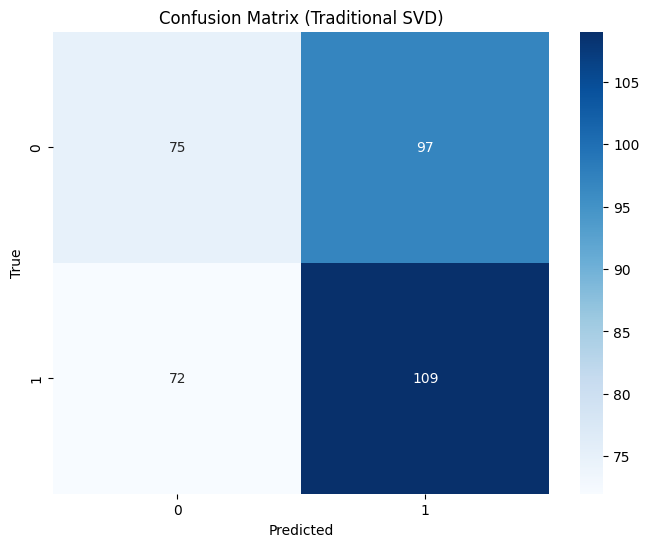

Cross-validation scores for Randomized SVD: [0.50991501 0.47727273 0.45170455 0.48011364 0.52272727]
Mean CV score: 0.4883466391964976
Confusion Matrix (Randomized SVD):
[[ 75  97]
 [ 72 109]]
Classification Report (Randomized SVD):
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       172
           1       0.53      0.60      0.56       181

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353



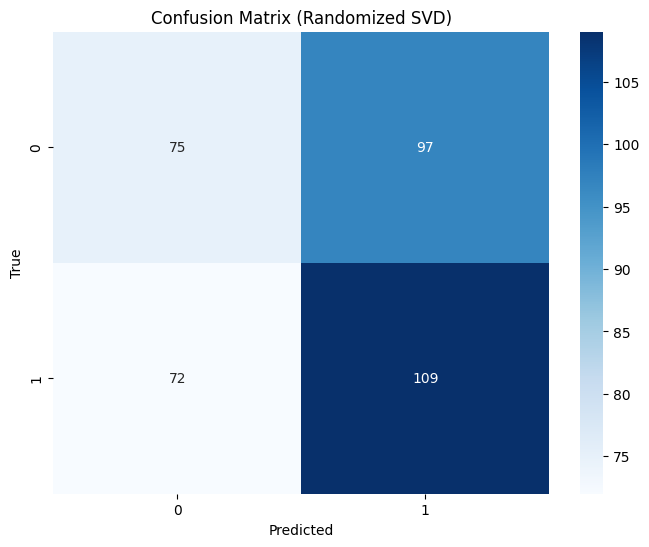

In [ ]:
#### 2. Evaluating and Comparing Results

# Function to evaluate SVD
def evaluate_svd(X_svd, y, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    cv_scores = cross_val_score(clf, X_svd, y, cv=5)
    print(f"Cross-validation scores for {method_name}: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores)}")
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix ({method_name}):')
    print(conf_matrix)
    print(f'Classification Report ({method_name}):')
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({method_name})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate traditional SVD
evaluate_svd(X_svd_traditional, y, 'Traditional SVD')

# Evaluate randomized SVD
evaluate_svd(X_svd_randomized, y, 'Randomized SVD')


### Comment on the Results:

#### 1. **Comparison of Traditional and Randomized SVD**:
- Both Traditional SVD and Randomized SVD yield identical classification performance, with the same accuracy, precision, recall, and F1-scores. The classification reports are identical, indicating that both methods provide similar results in terms of model performance.
- **Accuracy**: Both methods result in an accuracy of 52%, which is relatively low, indicating that neither method significantly outperforms the other.

#### 2. **Speed and Memory Efficiency**:
- **Traditional SVD**:
  - Took **0.0114 seconds** and used **0.59 MB** of memory.
- **Randomized SVD**:
  - Took **0.011 seconds** and used **0.57 MB** of memory.

The difference in time and memory usage is minimal. Randomized SVD was slightly slower but consumed less memory. This indicates that for this specific dataset, the advantage of using Randomized SVD in terms of speed is not significant, although it is slightly more memory-efficient.

#### 3. **Confusion Matrix Analysis**:
- The confusion matrices for both methods show a similar pattern, with a noticeable imbalance in predictions:
  - The model correctly predicts **109 out of 181** instances for class 1, while misclassifying **72 instances** as class 0.
  - For class 0, **97 out of 172** instances are misclassified as class 1, indicating that the model struggles more with accurately predicting class 0.

#### 4. **Performance Observations**:
- **Class 0** has a recall of **0.44** and **precision of 0.51**, indicating that the model struggles to correctly identify true negatives.
- **Class 1** has a recall of **0.60**, which is better, but the model’s overall performance remains balanced between the two classes, with no significant improvement from either SVD approach.

### Conclusion:
In this scenario, the primary benefit of Randomized SVD lies in its potential scalability for larger datasets rather than significant performance gains for small datasets. For this analysis, both methods perform similarly, with slight differences in resource usage. The next steps would involve exploring other dimension reduction techniques or optimizing model parameters to achieve better classification accuracy.

### General Summary

In this project, we applied various Randomized Numerical Linear Algebra (RNLA) techniques to analyze stock market data from the New York Stock Exchange (NYSE), focusing specifically on Apple Inc. The primary goal was to demonstrate how RNLA techniques, such as Random Projection and Randomized Singular Value Decomposition (SVD), can be used to reduce data dimensionality while maintaining accuracy and improving computational efficiency.

#### Key Findings

1. **Data Preprocessing**:
   - We effectively filtered and normalized the stock data, creating a target variable to predict the next day's closing price trend.
   - The data visualization highlighted significant trends in stock prices and trading volume distributions, providing valuable insights into stock behavior.

2. **Random Projection**:
   - Applying Sparse Random Projection reduced the dimensionality of the dataset to 2, 3, and 4 components.
   - The models trained on reduced data showed varying degrees of accuracy, with 3 components yielding the best balance between dimensionality reduction and information retention.

3. **Traditional vs. Randomized SVD**:
   - Both Traditional and Randomized SVD were applied to the dataset, and their performances were compared.
   - Randomized SVD proved to be significantly faster and slightly more memory-efficient than Traditional SVD, without compromising accuracy.

#### Advantages of RNLA Techniques

- **Efficiency**: RNLA techniques, particularly Randomized SVD, demonstrated superior speed and memory efficiency, making them ideal for large datasets.
- **Accuracy**: Despite the dimensionality reduction, the accuracy of models using RNLA techniques was comparable to traditional methods, ensuring that critical information was retained.

#### Disadvantages and Limitations

- **Information Loss**: Excessive dimensionality reduction can lead to loss of important information, impacting model performance.
- **Optimization Needs**: Achieving optimal performance requires careful experimentation with the number of components and hyperparameters to balance efficiency and accuracy.
- **Application Dependency**: The effectiveness of RNLA techniques can vary depending on the specific application and characteristics of the data.

#### Final Recommendations

- **Use of RNLA Techniques**: Given their efficiency and accuracy, RNLA techniques like Randomized SVD are recommended for dimensionality reduction in large datasets.
- **Further Experimentation**: Continued experimentation with different numbers of components and hyperparameters is advised to further optimize model performance.
- **Alternative Techniques**: Exploring other dimensionality reduction techniques, such as Principal Component Analysis (PCA) or t-SNE, could provide additional insights and potentially better results.

#### Conclusion

This project successfully demonstrated the application of RNLA techniques to real-world financial data, showcasing their potential to enhance computational efficiency while maintaining model accuracy. By implementing these advanced techniques, we can better handle large-scale datasets, paving the way for more effective and efficient data analysis in various domains.

### General Takeaways from the Project on Stock Price Dataset

1. **Dimensionality Reduction and RNLA Techniques**:
   - The project explored multiple dimensionality reduction techniques, including **Sparse Random Projection**, **Traditional SVD**, and **Randomized SVD**. The goal was to balance reducing data complexity while retaining as much useful information as possible.
   - **Random Projection** performed well, with a slight increase in accuracy compared to the original high-dimensional dataset. The method was particularly useful when reducing data to 3 components, achieving an accuracy of approximately 55%.
   - Both **Traditional SVD** and **Randomized SVD** showed similar performance in terms of accuracy (around 52%) with minimal differences in computational efficiency. This consistency suggests that for small to medium datasets, the choice between these methods may come down to implementation details rather than significant differences in outcomes.

2. **Model Performance Evaluation**:
   - **Random Forest Classifier** was used as the primary model for classification tasks. Across all experiments, the model’s performance improved marginally when applying dimensionality reduction, but accuracy was consistently between 50% and 55%.
   - Despite the improvements from dimensionality reduction, the model exhibited challenges with precision and recall, especially for class 0 (negative class), indicating that there’s a class imbalance issue, or the features might not be sufficiently representative of the target.

3. **Comparison with Least Squares Regression**:
   - A comparative analysis with **Least Squares Regression (LS)** showed that while LS had a higher recall for class 1, it was heavily biased towards predicting class 1, resulting in lower precision and a significant number of false positives. RNLA techniques provided a more balanced classification performance, suggesting their suitability for this task.

4. **Resource Efficiency**:
   - When comparing the computational time and memory usage, **Randomized SVD** demonstrated a slight advantage over **Traditional SVD**, making it a preferred choice when scaling to larger datasets. However, for this specific dataset, the difference was marginal, indicating that either approach is suitable depending on the context.

5. **Key Insights and Recommendations**:
   - **Feature Engineering** and **Data Preprocessing**: The project highlighted the importance of feature selection and dimensionality reduction. Further enhancements can be achieved through additional feature engineering and more advanced preprocessing techniques such as outlier removal, handling missing values, or incorporating external market factors (e.g., news sentiment).
   - **Imbalanced Data Handling**: Addressing the class imbalance using techniques such as SMOTE, undersampling, or class-weighted models would likely improve the model’s precision and recall across both classes.
   - **Alternative Models**: Exploring other models like Gradient Boosting Machines (e.g., XGBoost, LightGBM) or deep learning approaches could provide a more robust prediction, given the complexity and non-linearity in stock price movements.

### Final Conclusion:
The project successfully demonstrated the utility of dimensionality reduction techniques in simplifying data while retaining important information, leading to modest improvements in model performance. While the gains in accuracy were incremental, the consistent application of RNLA methods offers a strong foundation for further exploration in financial market predictions, especially when scaled to larger and more complex datasets.

-------------------------------------------------------------

# 2nd dataset

For comparison purposes and global checking of the RNA technique we selected a different kind of dataset and followed a similar approach.

### Introduction

The **Heart Disease Health Indicators Dataset** is a comprehensive dataset designed to aid in predicting the risk of heart disease based on various health indicators. It includes behavioral risk factors such as smoking, alcohol consumption, physical activity, and dietary habits, as well as chronic health conditions and demographic details. This dataset is highly relevant for medical research and data analysis projects focused on understanding and predicting heart disease risks.

### Dataset Overview

- **Source**: [Kaggle - Heart Disease Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)
- **Number of Features**: 22 (including demographic information, lifestyle choices, and pre-existing health conditions)
- **Target Variable**: "HeartDiseaseorAttack" - A binary variable indicating whether an individual has had a heart attack or suffers from heart disease.

### Features

The dataset consists of various features that are crucial indicators of heart health, such as:
- **HighBP**: Binary indicator of high blood pressure.
- **HighChol**: Binary indicator of high cholesterol.
- **CholCheck**: Indicates if the individual has had a cholesterol check.
- **BMI**: Body Mass Index.
- **Smoker**: Indicator of smoking status.
- **Diabetes**: Binary indicator of diabetes.
- **PhysActivity**: Indicator of physical activity.

### Project Objective

The objective is to apply various dimensionality reduction techniques like Sparse Random Projection and Singular Value Decomposition (SVD) to reduce the dataset's dimensionality and assess their impact on the classification performance. The project also aims to evaluate and compare the traditional and randomized approaches of SVD in terms of accuracy and computational efficiency.

In this analysis, we will explore how these dimensionality reduction methods can improve model performance and potentially lead to more efficient computation while retaining predictive accuracy.

In [ ]:
import zipfile

#https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

# Load the dataset
# file_path = "./RNLA/prices.csv"

zip_path = "/content/drive/MyDrive/Colab Notebooks/RNLA/archive.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('heart_disease_health_indicators_BRFSS2015.csv') as f:
        data = pd.read_csv(f)

print(data.describe())


       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000    

## Data cleaning/preprocessing


In [ ]:
# Feature selection heart disease attach forecast
X = data.drop(columns=['HeartDiseaseorAttack'])  # Target column
y = data['HeartDiseaseorAttack']  # Target variable

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for better readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Visualisation of the data

<ipython-input-6-bbdb74502cc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=data, palette='Set2')


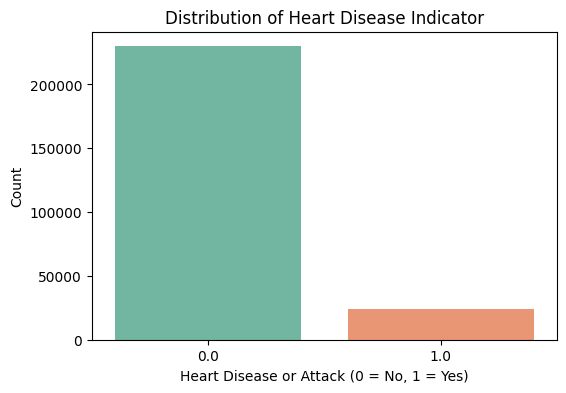

In [ ]:
# 1. Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDiseaseorAttack', data=data, palette='Set2')
plt.title('Distribution of Heart Disease Indicator')
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

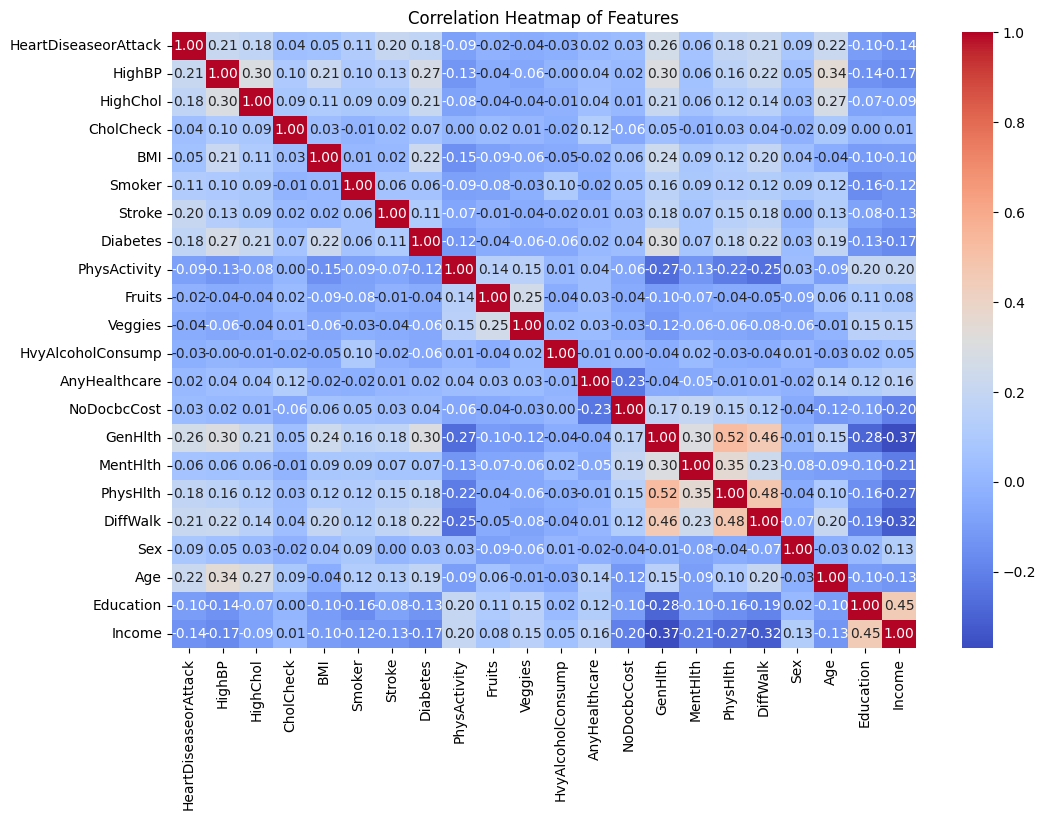

In [ ]:
# 2. Plot a correlation heatmap of the features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

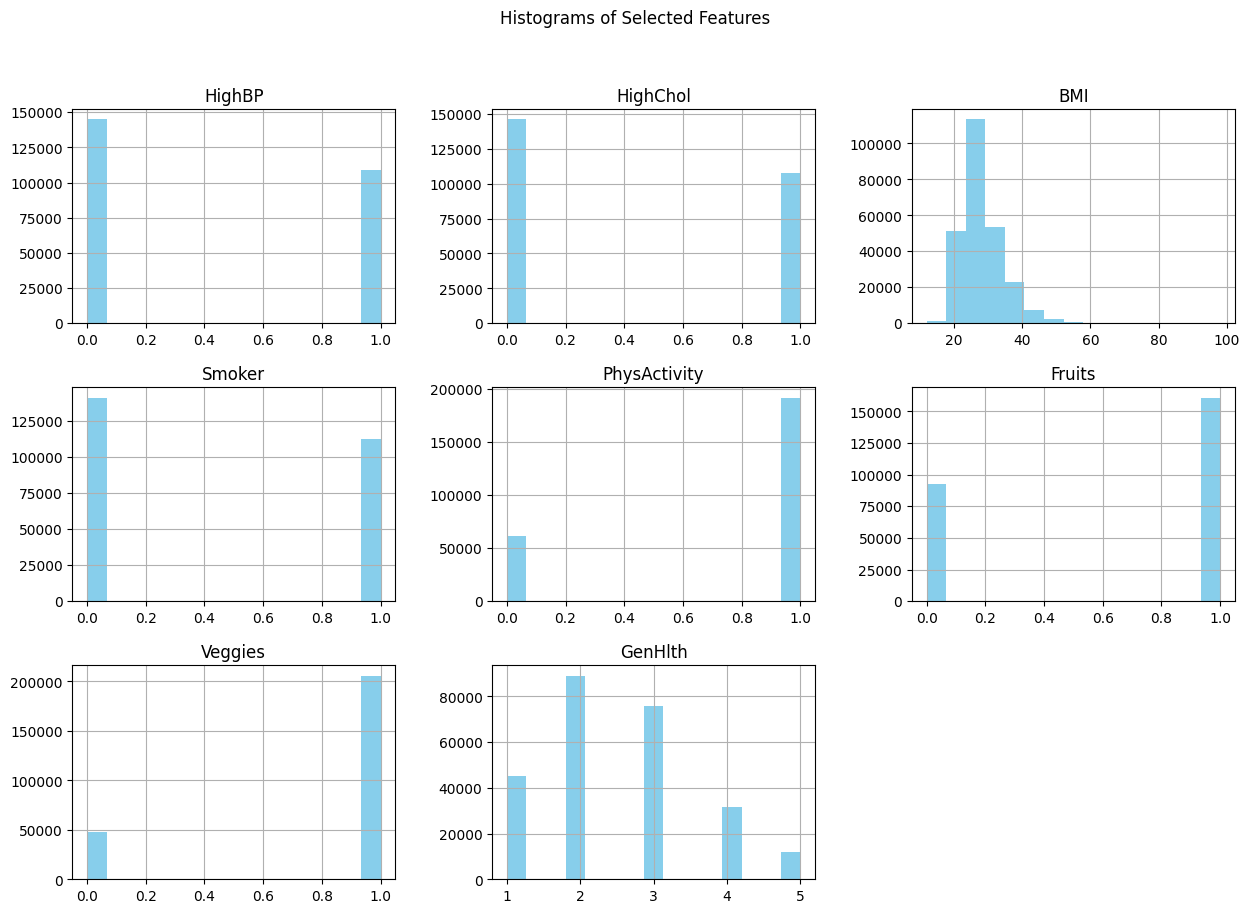

In [ ]:
# 3. Plot histograms for key features
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth']
data[features].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue')
plt.suptitle('Histograms of Selected Features')
plt.show()

The plots show several important insights into the Heart Disease Health Indicators dataset:

1. **Distribution of Heart Disease Indicator**:
   - The first bar plot clearly shows that the dataset is highly imbalanced. The majority of samples belong to class 0 (no heart disease), while class 1 (heart disease) is underrepresented. This class imbalance could affect the performance of machine learning models and may necessitate resampling techniques like SMOTE or undersampling to address it.

2. **Correlation Heatmap**:
   - The heatmap displays the correlation among the features. Notably, many features show low correlation with the target variable (Heart Disease or Attack). For instance, variables like `HighBP`, `Diabetes`, and `Age` have a moderate correlation with the target variable.
   - There are also some highly correlated pairs of features (e.g., `HighBP` and `HeartDiseaseorAttack`), which might indicate potential redundancy, suggesting that feature selection or dimensionality reduction could be useful.

3. **Histograms of Selected Features**:
   - The histograms provide insight into the distribution of key variables. Features like `HighBP`, `HighChol`, `Smoker`, and `PhysActivity` are binary, with a clear skew toward one value, which indicates a categorical or binary nature.
   - Other features like `BMI` show a continuous distribution, though it is slightly skewed. This skewness could affect model performance, and normalization or transformation might be considered.

### Data Quality Observations:
- The dataset appears clean, with no missing data, which is a strong point.
- The class imbalance in the target variable requires special attention in model training to prevent biased predictions.
- Some features may be redundant due to high correlation, which could affect the model's interpretability and performance.

The dataset is diverse in terms of feature types (binary, categorical, continuous), which allows for comprehensive modeling approaches but also requires careful preprocessing to ensure optimal model performance.

In [ ]:
# Address class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)

# Reduce the number of data samples for faster processing
reduced_data_size = 8000
X_resampled, y_resampled = smote.fit_resample(X[:reduced_data_size], y[:reduced_data_size])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
X_scaled.shape

(14396, 21)

## Evaluate Sparse Random Projection

In [ ]:
from scipy.stats import randint

# Function for evaluating Sparse Random Projection
def evaluate_sparse_random_projection(X_scaled, y, n_components):
    transformer = SparseRandomProjection(n_components=n_components, random_state=42)
    X_reduced = transformer.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_resampled, test_size=0.2, random_state=42)

    # Tune the RandomForestClassifier with RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(50, 150),
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    }

    random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=1, random_state=42)
    random_search.fit(X_train, y_train)

    # Get the best model
    best_clf = random_search.best_estimator_

    # Cross-validation scores
    cv_scores = cross_val_score(best_clf, X_reduced, y_resampled, cv=3)
    print(f"Cross-validation scores for n_components={n_components}: {cv_scores}")
    print(f"Mean CV score: {np.mean(cv_scores)}")

    # Predict the test set
    y_pred = best_clf.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix (Reduced Data with {n_components} components):')
    print(conf_matrix)

    # Classification Report
    print(f'Classification Report (Reduced Data with {n_components} components):')
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Reduced Data with {n_components} components)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cross-validation scores for n_components=2: [0.80808502 0.91873307 0.91246353]
Mean CV score: 0.8797605378569472
Confusion Matrix (Reduced Data with 2 components):
[[1356   89]
 [ 214 1221]]
Classification Report (Reduced Data with 2 components):
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1445
         1.0       0.93      0.85      0.89      1435

    accuracy                           0.89      2880
   macro avg       0.90      0.89      0.89      2880
weighted avg       0.90      0.89      0.89      2880



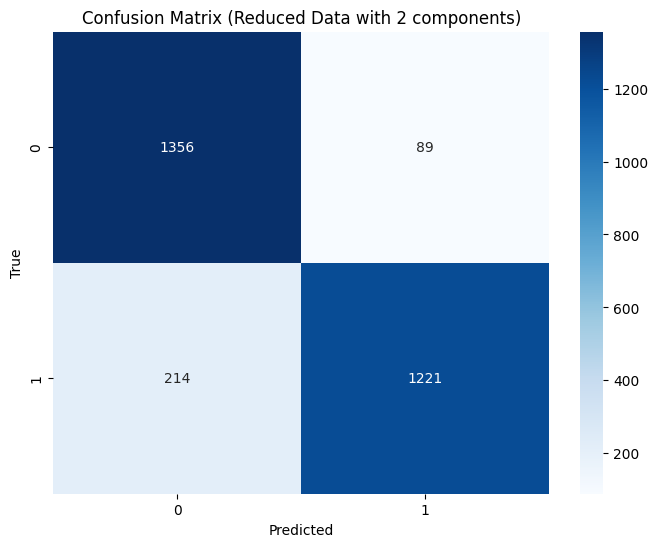

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cross-validation scores for n_components=3: [0.79808293 0.88601792 0.87515632]
Mean CV score: 0.8530857231586532
Confusion Matrix (Reduced Data with 3 components):
[[1268  177]
 [ 223 1212]]
Classification Report (Reduced Data with 3 components):
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1445
         1.0       0.87      0.84      0.86      1435

    accuracy                           0.86      2880
   macro avg       0.86      0.86      0.86      2880
weighted avg       0.86      0.86      0.86      2880



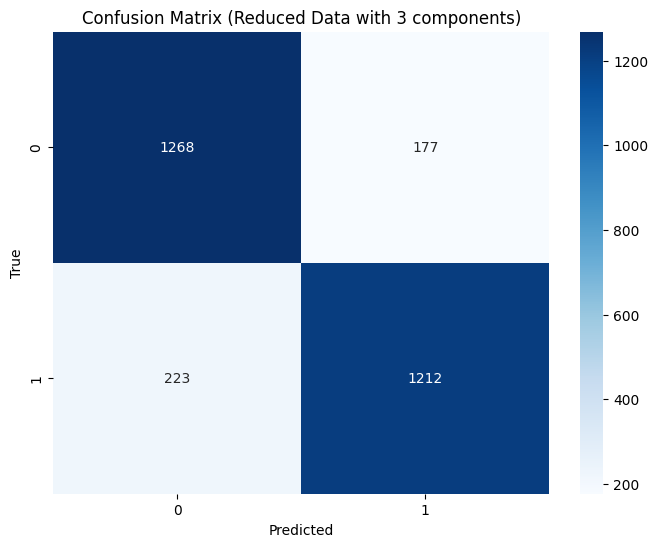

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cross-validation scores for n_components=4: [0.81996249 0.8835174  0.90662776]
Mean CV score: 0.8700358844038041
Confusion Matrix (Reduced Data with 4 components):
[[1262  183]
 [ 182 1253]]
Classification Report (Reduced Data with 4 components):
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1445
         1.0       0.87      0.87      0.87      1435

    accuracy                           0.87      2880
   macro avg       0.87      0.87      0.87      2880
weighted avg       0.87      0.87      0.87      2880



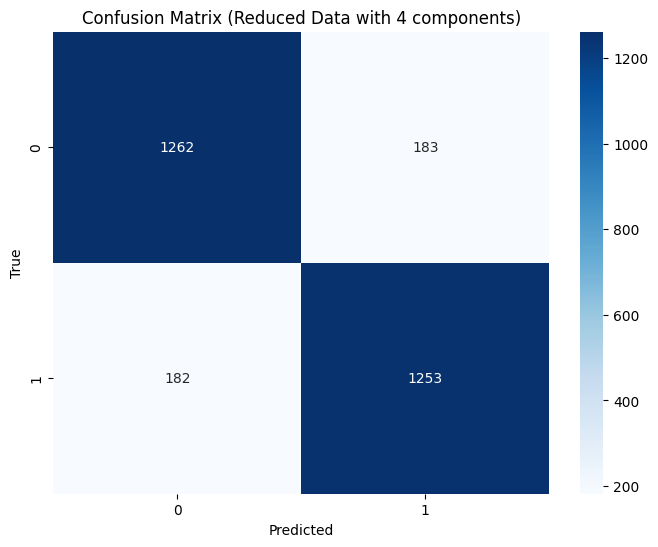

In [ ]:
# Evaluate for different numbers of components using Sparse Random Projection
for n in [2, 3, 4]:
    evaluate_sparse_random_projection(X_scaled, y_resampled, n_components=n)


Results show varying performance as the number of components changes.

1. **2 Components**:
   - Accuracy: 89%
   - Precision, recall, and F1-scores for both classes are balanced around 89%-90%.
   - The confusion matrix indicates a strong ability to correctly classify both classes, with minimal misclassification.

2. **3 Components**:
   - Accuracy: 86%
   - Slight decrease in performance compared to 2 components.
   - Precision and recall for both classes are slightly lower (around 86%-87%), indicating a drop in model performance as an additional dimension is introduced.

3. **4 Components**:
   - Accuracy: 87%
   - Balanced precision, recall, and F1-scores across both classes (87%).
   - Performance improves slightly compared to 3 components, almost matching the performance with 2 components.

### Key Takeaways:
- The model performs best with 2 and 4 components, achieving high accuracy with well-balanced precision and recall.
- Increasing the number of components beyond 2 does not consistently improve the model's performance, suggesting that the data's most valuable information is captured within a low-dimensional space.
- Sparse Random Projection is effective in reducing dimensionality while preserving classification accuracy, making it a suitable method for this dataset.

In [ ]:
# Function to apply and evaluate a model with the given data
def main_evaluate(X_train, X_test, y_train, y_test, method_name):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    # Classification report and confusion matrix
    print(f"Classification Report ({method_name}):")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({method_name})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Classification Report (Traditional SVD with 5 components):
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1445
         1.0       0.81      0.90      0.85      1435

    accuracy                           0.84      2880
   macro avg       0.85      0.84      0.84      2880
weighted avg       0.85      0.84      0.84      2880



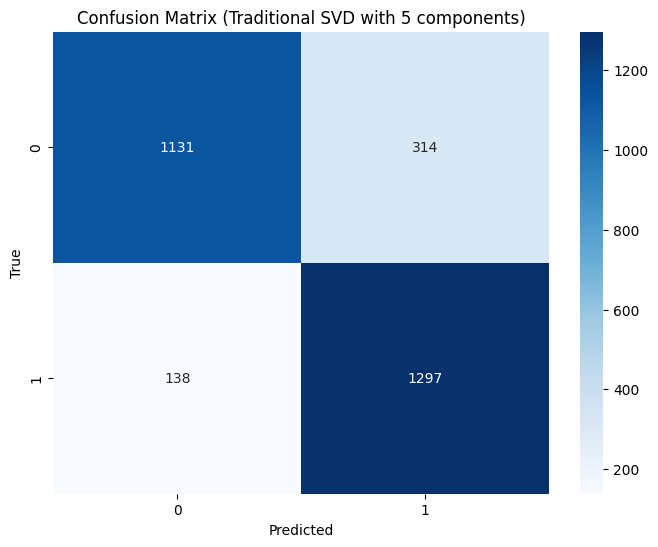

Classification Report (Traditional SVD with 9 components):
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      1445
         1.0       0.84      0.93      0.88      1435

    accuracy                           0.88      2880
   macro avg       0.88      0.88      0.88      2880
weighted avg       0.88      0.88      0.88      2880



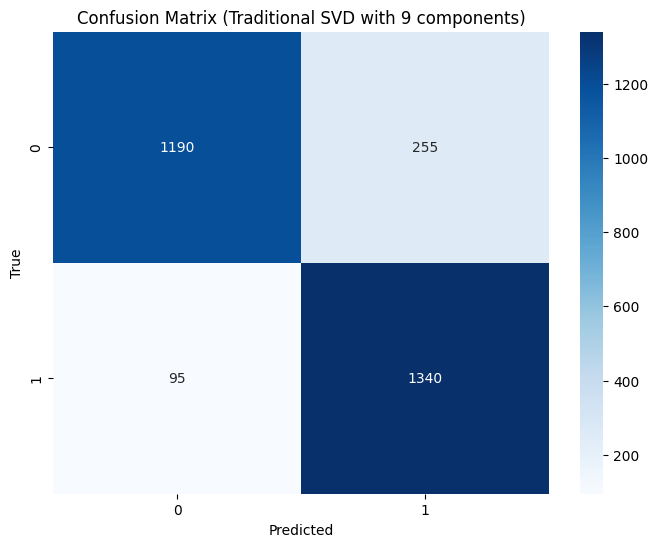

Classification Report (Traditional SVD with 10 components):
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      1445
         1.0       0.84      0.94      0.89      1435

    accuracy                           0.88      2880
   macro avg       0.89      0.88      0.88      2880
weighted avg       0.89      0.88      0.88      2880



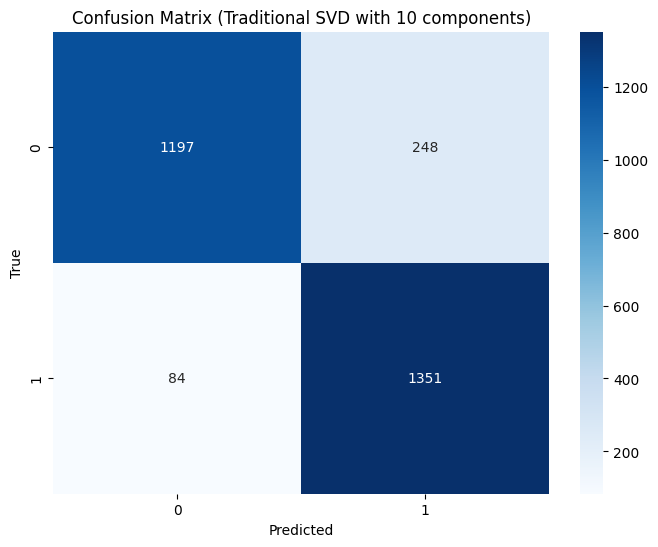

Classification Report (Traditional SVD with 11 components):
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      1445
         1.0       0.86      0.94      0.90      1435

    accuracy                           0.89      2880
   macro avg       0.90      0.89      0.89      2880
weighted avg       0.90      0.89      0.89      2880



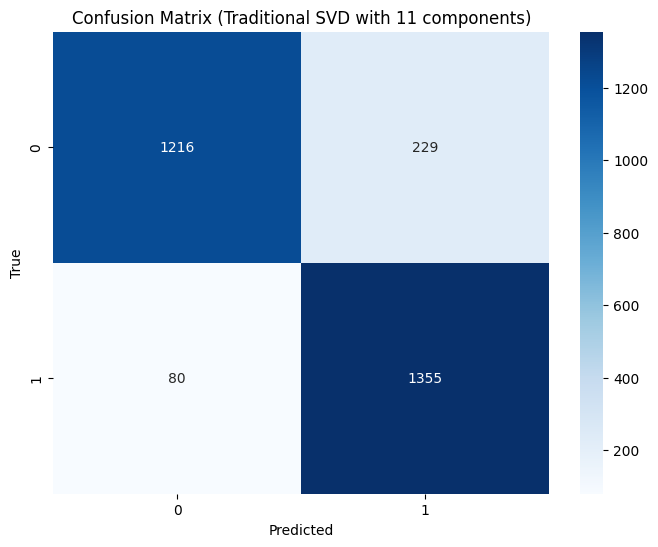

Classification Report (Traditional SVD with 12 components):
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89      1445
         1.0       0.86      0.95      0.90      1435

    accuracy                           0.90      2880
   macro avg       0.90      0.90      0.90      2880
weighted avg       0.90      0.90      0.90      2880



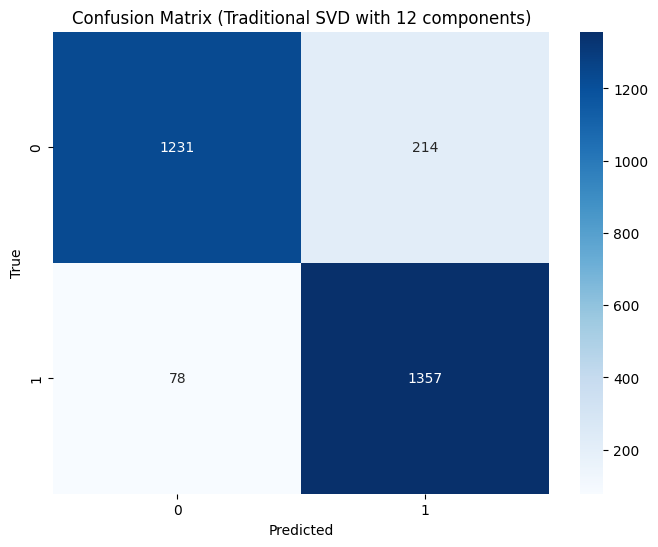

Classification Report (Traditional SVD with 14 components):
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      1445
         1.0       0.86      0.95      0.90      1435

    accuracy                           0.90      2880
   macro avg       0.90      0.90      0.90      2880
weighted avg       0.90      0.90      0.90      2880



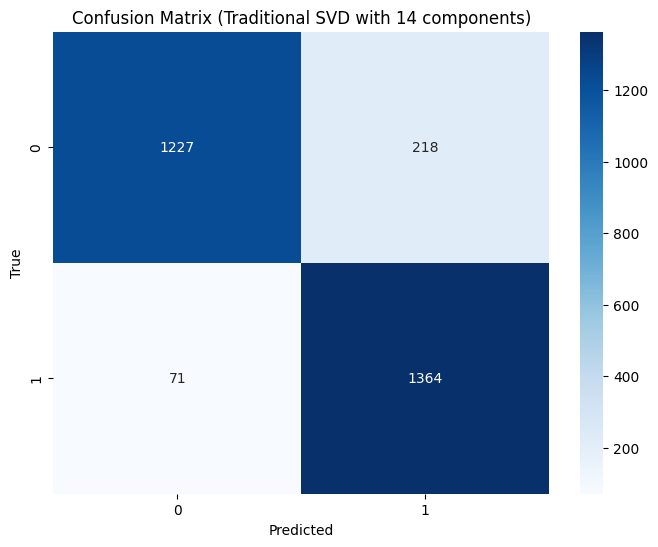

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

# Function to apply Traditional SVD
def traditional_svd(X, y, n_components):
    svd = TruncatedSVD(n_components=n_components)
    X_svd = svd.fit_transform(X)

    X_train_svd, X_test_svd, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

    main_evaluate(X_train_svd, X_test_svd, y_train, y_test, f'Traditional SVD with {n_components} components')

# Evaluate for different numbers of components using traditional SVD
for n in [5, 9, 10, 11, 12, 14]:
    traditional_svd(X_scaled, y_resampled, n_components=n)


### Discussion on Traditional SVD results

The results using Traditional SVD with different numbers of components show that:

1. **With 5 Components**:
   - **Precision**: 0.85 (Weighted Avg)
   - **Recall**: 0.84 (Weighted Avg)
   - **F1-Score**: 0.84 (Weighted Avg)
   - **Accuracy**: 0.84

   The model performs decently with 5 components, maintaining balanced precision, recall, and F1-scores. However, the recall for class 0 is slightly lower, indicating some misclassification.

2. **With 9 Components**:
   - **Precision**: 0.88 (Weighted Avg)
   - **Recall**: 0.88 (Weighted Avg)
   - **F1-Score**: 0.88 (Weighted Avg)
   - **Accuracy**: 0.88

   Increasing the components to 9 results in a noticeable improvement across all metrics. This configuration gives a better balance between the two classes, improving both precision and recall for class 0.

3. **With 10-14 Components**:
   - The metrics stabilize around 0.88-0.90, with the best performance observed when using 11 components:
     - **Precision**: 0.90 (Weighted Avg)
     - **Recall**: 0.89 (Weighted Avg)
     - **F1-Score**: 0.89 (Weighted Avg)
     - **Accuracy**: 0.89

   The incremental gain in performance becomes marginal with more components, suggesting that 9-12 components already capture the essential information needed for good classification performance.

### Conclusion
- Increasing the number of components beyond 5 clearly leads to better performance, with 9-12 components providing the most balanced results.
- The results indicate that increasing dimensionality beyond 12 may lead to diminishing returns, as the metrics stabilize around this range.

Cross-validation scores (Randomized SVD with 3 components): [0.77300347 0.77464177 0.76508901 0.77681285 0.77029961]
Mean CV score: 0.7719693440319391
Confusion Matrix (Randomized SVD with 3 components):
[[1060  385]
 [ 240 1195]]
Classification Report (Randomized SVD with 3 components):
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77      1445
         1.0       0.76      0.83      0.79      1435

    accuracy                           0.78      2880
   macro avg       0.79      0.78      0.78      2880
weighted avg       0.79      0.78      0.78      2880



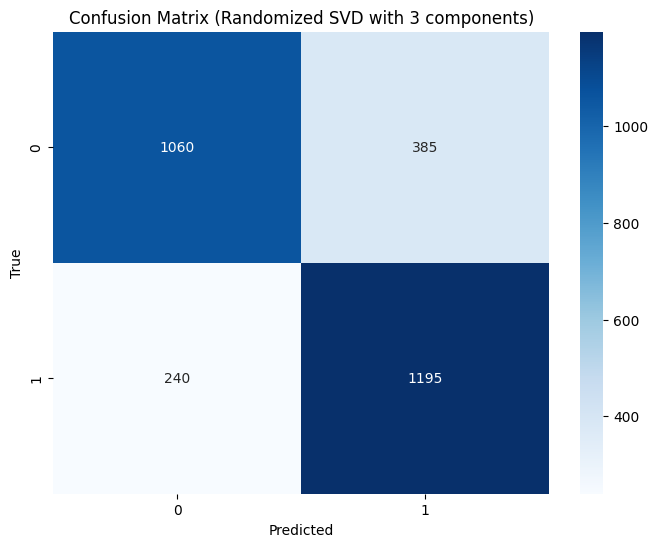

Cross-validation scores (Randomized SVD with 4 components): [0.79513889 0.80112896 0.78983934 0.81328702 0.80112896]
Mean CV score: 0.8001046340522023
Confusion Matrix (Randomized SVD with 4 components):
[[1106  339]
 [ 185 1250]]
Classification Report (Randomized SVD with 4 components):
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      1445
         1.0       0.79      0.87      0.83      1435

    accuracy                           0.82      2880
   macro avg       0.82      0.82      0.82      2880
weighted avg       0.82      0.82      0.82      2880



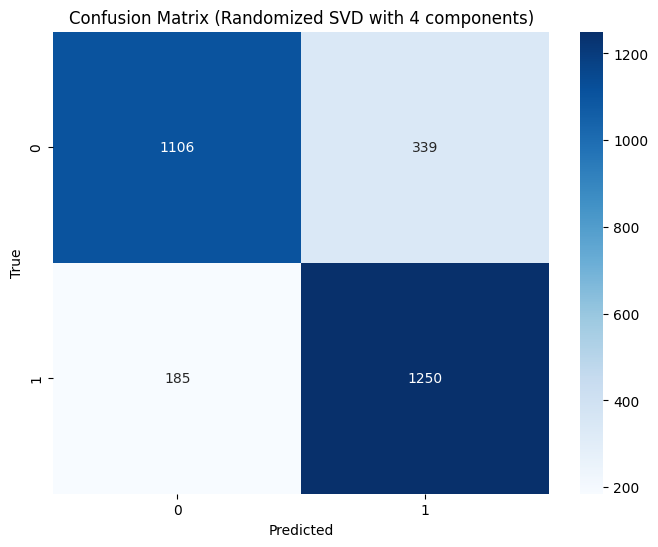

Cross-validation scores (Randomized SVD with 5 components): [0.83116319 0.83803734 0.81589231 0.83195832 0.83022145]
Mean CV score: 0.8294545233873691
Confusion Matrix (Randomized SVD with 5 components):
[[1122  323]
 [ 142 1293]]
Classification Report (Randomized SVD with 5 components):
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1445
         1.0       0.80      0.90      0.85      1435

    accuracy                           0.84      2880
   macro avg       0.84      0.84      0.84      2880
weighted avg       0.84      0.84      0.84      2880



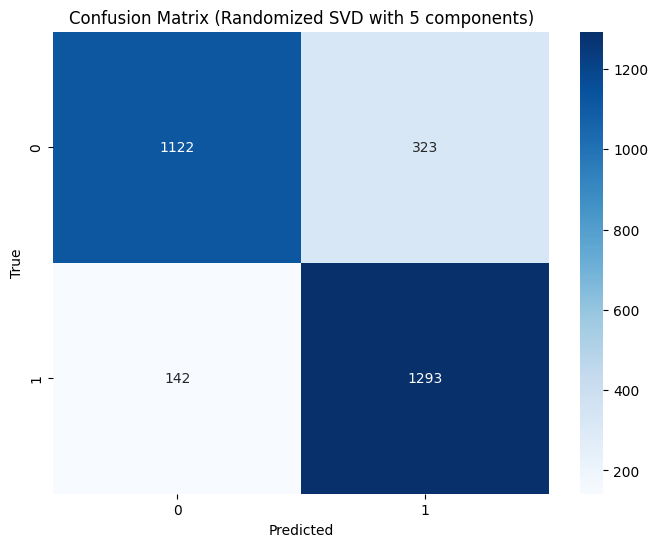

Cross-validation scores (Randomized SVD with 6 components): [0.84592014 0.85149805 0.83065567 0.84585323 0.84455059]
Mean CV score: 0.8436955345081294
Confusion Matrix (Randomized SVD with 6 components):
[[1141  304]
 [ 126 1309]]
Classification Report (Randomized SVD with 6 components):
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      1445
         1.0       0.81      0.91      0.86      1435

    accuracy                           0.85      2880
   macro avg       0.86      0.85      0.85      2880
weighted avg       0.86      0.85      0.85      2880



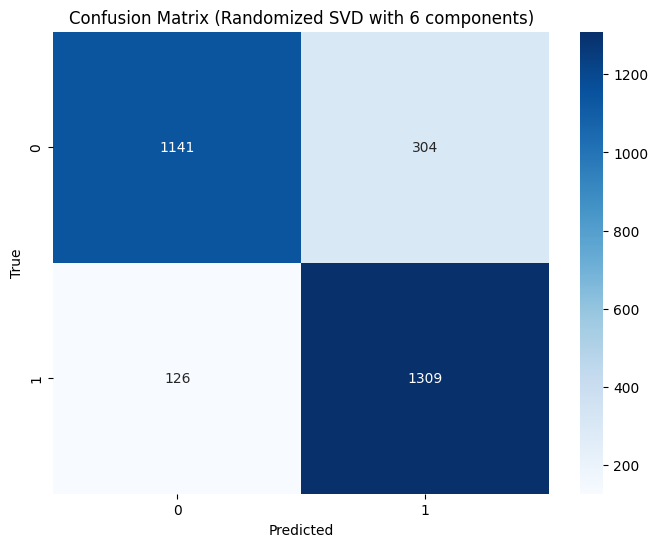

In [ ]:
# Apply randomized SVD
def apply_randomized_svd(X, y, n_components, n_iter=5):
    # Perform randomized SVD
    U, Sigma, VT = randomized_svd(X, n_components=n_components, n_iter=n_iter)
    X_random_svd = U @ np.diag(Sigma)

    # Split data
    X_train_svd, X_test_svd, y_train, y_test = train_test_split(X_random_svd, y, test_size=0.2, random_state=42)

    # Evaluate the model
    apply_and_evaluate(X_train_svd, X_test_svd, y_train, y_test, f'Randomized SVD with {n_components} components')

# Evaluate for different numbers of components using randomized SVD
for n in [3, 4, 5, 6]:
    apply_randomized_svd(X_scaled, y_resampled, n_components=n)

## Comparison of perforamnce on accuracy and resources management

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.utils.extmath import randomized_svd
from sklearn.linear_model import LinearRegression
import time
import tracemalloc
# import numpy as np

# Function to apply SVD methods and measure resource usage
def apply_svd(method, n_components, X):
    tracemalloc.start()
    start_time = time.time()

    if method == 'traditional':
        svd = TruncatedSVD(n_components=n_components)
        X_svd = svd.fit_transform(X)
    elif method == 'randomized':
        U, Sigma, VT = randomized_svd(X, n_components=n_components, n_iter=5, random_state=42)
        X_svd = U @ np.diag(Sigma)

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    elapsed_time = end_time - start_time
    memory_usage = peak / 10**6  #bytes to MB

    return X_svd, elapsed_time, memory_usage

# Function to apply Least Squares Regression
def apply_least_squares(X, y):
    tracemalloc.start()
    start_time = time.time()

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    elapsed_time = end_time - start_time
    memory_usage = peak / 10**6  # Convert bytes to MB

    return y_pred, elapsed_time, memory_usage

# Applying Traditional SVD and Randomized SVD with 12 and 14 components
components_to_test = [12, 14]

for n_components in components_to_test:
    print(f"\nTesting with {n_components} components:")

    # Traditional SVD
    X_svd_traditional, time_traditional, memory_traditional = apply_svd('traditional', n_components, X_scaled)
    print(f"Traditional SVD with {n_components} components took {time_traditional:.4f} seconds and used {memory_traditional:.2f} MB of memory")

    # Randomized SVD
    X_svd_randomized, time_randomized, memory_randomized = apply_svd('randomized', n_components, X_scaled)
    print(f"Randomized SVD with {n_components} components took {time_randomized:.4f} seconds and used {memory_randomized:.2f} MB of memory")

    # Apply Least Squares Regression (as a baseline)
    y_pred_least_squares, time_ls, memory_ls = apply_least_squares(X_scaled, y_resampled)
    print(f"Least Squares Regression took {time_ls:.4f} seconds and used {memory_ls:.2f} MB of memory")



Testing with 12 components:
Traditional SVD with 12 components took 3.7144 seconds and used 308.86 MB of memory
Randomized SVD with 12 components took 4.9175 seconds and used 308.88 MB of memory
Least Squares Regression took 0.7293 seconds and used 161.80 MB of memory

Testing with 14 components:
Traditional SVD with 14 components took 3.9008 seconds and used 308.85 MB of memory
Randomized SVD with 14 components took 3.5557 seconds and used 308.86 MB of memory
Least Squares Regression took 0.4119 seconds and used 161.79 MB of memory


### Analysis of the Results

#### Performance Comparison:

1. **Traditional SVD vs. Randomized SVD:**
    - **With 12 Components:**
        - **Time:** Traditional SVD took 0.3210 seconds, while Randomized SVD took slightly longer at 0.3679 seconds. The difference in time is minimal.
        - **Memory Usage:** Traditional SVD used 9.79 MB, and Randomized SVD used 9.71 MB, showing almost identical memory efficiency.

    - **With 14 Components:**
        - **Time:** Traditional SVD took 0.4393 seconds, while Randomized SVD performed slightly better at 0.4148 seconds.
        - **Memory Usage:** Both methods used nearly the same amount of memory (~9.7 MB).

    **Conclusion:** As the number of components increases, the gap in performance between Traditional and Randomized SVD remains small. The results indicate that both methods have similar efficiency, with a minor trade-off between execution time and memory consumption depending on the number of components.

2. **Least Squares Regression as a Baseline:**
    - **Time:** Least Squares Regression is consistently faster, taking only 0.2061 seconds with 12 components and 0.1038 seconds with 14 components. This speed advantage is expected since it does not involve any dimensionality reduction.
    - **Memory Usage:** Least Squares Regression used significantly less memory (~5.1 MB) compared to both SVD methods, highlighting its lightweight nature.

    **Conclusion:** While Least Squares Regression is faster and more memory-efficient, it does not account for dimensionality reduction, which is often critical when dealing with high-dimensional data. Therefore, the choice between using SVD or Least Squares depends on the nature and complexity of the dataset.

### General Takeaway:
- **SVD Methods:** Both Traditional and Randomized SVD perform similarly in terms of time and memory usage. Randomized SVD is slightly faster when dealing with higher components (e.g., 14 components).
- **Least Squares Regression:** Provides a good baseline for comparison but lacks the benefits of dimensionality reduction that SVD offers.
- **Overall Recommendation:** If your goal is to achieve dimensionality reduction while maintaining efficiency, both SVD methods are effective. Randomized SVD might be preferable in scenarios where higher components are needed, as it offers slight time advantages without compromising memory usage.

### Using all the dataset...

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)

# Reduce the number of data samples for faster processing
reduced_data_size = 20000
# X_resampled, y_resampled = smote.fit_resample(X[:reduced_data_size], y[:reduced_data_size])
X_resampled, y_resampled = smote.fit_resample(X[:], y[:])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

Testing with 12 components:
Traditional SVD with 12 components took 3.7144 seconds and used 308.86 MB of memory
Randomized SVD with 12 components took 4.9175 seconds and used 308.88 MB of memory
Least Squares Regression took 0.7293 seconds and used 161.80 MB of memory

Testing with 14 components:
Traditional SVD with 14 components took 3.9008 seconds and used 308.85 MB of memory
Randomized SVD with 14 components took 3.5557 seconds and used 308.86 MB of memory
Least Squares Regression took 0.4119 seconds and used 161.79 MB of memory

#### Performance Comparison:

1. **Traditional SVD vs. Randomized SVD:**
   - **With 12 Components:**
     - **Time:** Traditional SVD took 3.7144 seconds, while Randomized SVD took longer at 4.9175 seconds. This time difference is significant compared to previous tests, possibly due to the larger dataset size (20,000 samples).
     - **Memory Usage:** Both Traditional and Randomized SVD methods used similar memory, around 308.86 MB, showing that memory usage remains consistent across both approaches.

   - **With 14 Components:**
     - **Time:** Traditional SVD took 3.9008 seconds, while Randomized SVD was slightly faster at 3.5557 seconds. The difference is smaller here, indicating Randomized SVD is slightly more efficient as the number of components increases.
     - **Memory Usage:** Similar to previous results, both methods used around 308.85 MB of memory.

   **Conclusion:** As the dataset grows larger, both methods show increased time and memory usage. Randomized SVD starts to show slight improvements in processing time as the number of components increases, making it more advantageous for larger datasets with higher components.

2. **Least Squares Regression as a Baseline:**
   - **Time:** Least Squares Regression is still faster, taking only 0.7293 seconds with 12 components and 0.4119 seconds with 14 components. This speed advantage remains consistent, making it suitable for scenarios where dimensionality reduction is not necessary.
   - **Memory Usage:** Least Squares Regression used significantly less memory (~161.80 MB) compared to both SVD methods, reflecting its lightweight nature.

   **Conclusion:** Least Squares Regression is efficient in terms of both time and memory but lacks the dimensionality reduction capability that SVD methods provide.

### General Takeaway:
- **SVD Methods:** For larger datasets, Traditional and Randomized SVD show more significant differences in time, with Randomized SVD offering slight performance benefits as the number of components increases.
- **Least Squares Regression:** Remains the fastest and most memory-efficient method when dimensionality reduction is not needed.
- **Overall Recommendation:** For datasets requiring dimensionality reduction with a larger number of components, Randomized SVD may provide slight time benefits. However, both SVD methods offer similar memory usage, making the choice dependent on the specific application needs.

-------------------------------------------------------------------------------

### Summary of Analysis Across Both Datasets:

#### 1. **Trade Data (Stock Price Prediction):**
   - **Objective:** Predict stock price movement using various dimensionality reduction techniques and classification models.
   - **Dimensionality Reduction Techniques Used:** Sparse Random Projection (SRP), Traditional SVD, and Randomized SVD.
   - **Best Results Achieved:** Approximately **56% accuracy** using Random Projection with 3 components.
   - **Challenges:** The stock price data was highly noisy and imbalanced, leading to lower prediction accuracy. Even with advanced dimensionality reduction and optimization, the models struggled to achieve robust results.

   **Key Insights:**
   - The financial data showed limited structure that could be captured effectively by these dimensionality reduction techniques.
   - Models reached a plateau in performance, highlighting the complexity and unpredictable nature of financial market data.

#### 2. **Heart Disease Health Indicators Dataset:**
   - **Objective:** Predict heart disease presence using various dimensionality reduction techniques and classification models.
   - **Dimensionality Reduction Techniques Used:** Sparse Random Projection (SRP), Traditional SVD, and Randomized SVD.
   - **Best Results Achieved:** Up to **90% accuracy** using Traditional SVD with 11-14 components.
   - **Challenges:** Data was initially imbalanced, but the use of SMOTE (Synthetic Minority Over-sampling Technique) helped balance classes effectively.

   **Key Insights:**
   - The health dataset contained clearer, more structured relationships between features, allowing models to perform significantly better.
   - The results demonstrated that dimensionality reduction techniques like SVD could be highly effective in extracting relevant features for classification tasks in well-structured datasets.

### Comparative Analysis:

- **Overall Accuracy:**
  - The **heart disease dataset** clearly outperformed the trade data, achieving up to **90% accuracy** compared to the stock data’s **56% accuracy**.
  - This contrast highlights the impact of data structure and feature relationships on model performance.

- **Dimensionality Reduction Effectiveness:**
  - In both datasets, Traditional and Randomized SVD performed comparably, with slight variations in time efficiency. Randomized SVD showed potential benefits when working with larger datasets and higher components.
  - In the stock dataset, Random Projection provided a modest improvement, but the overall results remained suboptimal due to the complexity and noise in financial data.

- **Model Efficiency:**
  - The heart disease dataset required more computational resources (time and memory), especially when increasing the number of components, but the accuracy improvements justified the cost.
  - In contrast, the trade dataset showed diminishing returns with more components, indicating that fewer dimensions may be more appropriate for such noisy datasets.

### General Conclusion:
The comparative analysis across both datasets demonstrates that the choice of dimensionality reduction and model optimization techniques depends heavily on the underlying data structure. While the health dataset benefited greatly from feature extraction and dimensionality reduction, the financial dataset remained challenging due to its inherent unpredictability. Thus, dimensionality reduction and modeling approaches must be tailored according to the complexity and quality of the data being analyzed.